# Проект по анализу данных (ФЭН 2024 год)


**Выполнили:** Меркулова Анна Андреевна, Босхомджиева Алтана Савровна

## Шаг 1. Выбор темы

### Проект: анализ рынка мобильных телефонов на российском маркетплейсе Яндекс-Маркет. 
**В данном проекте анализируется рынок телефонов**: выявляются закономерности в данных, проверяются гипотезы о влиянии определенных характеристик на цену гаджета и обучается линейная регрессия, предсказывающая цену телефона исходя из его характеристик.
Данные будут собираться с сайта Яндекс-Маркета в мае 2024 года.

## Шаг 2. Сбор данных

Изначально данные для анализа мы решили **ПАРСИТЬ** с российского маркетплейса "Яндекс Маркет", где есть достаточно большой ассортимент телефонов. 

Мы даже написали код, который успешно смог скачать данные с сайта, однако проблема возникла при приобразовании этих данных в таблицу. Скорее всего это произошло из-за структуры сайта, так как там не кнопок перехода на другую страницу, а есть возможность нажать на кнопку **"Посмотреть еще"**, нажав на которую страница начинает загружаться. При работе этого кода просто напросто эта страница не могла загрузится :( 

Поэтому было принято решение собирать данные **ВРУЧНУЮ** (да-да мы собрали 1000 данных про разные телефоны сами, убили на это много времени, но мы очень хотели завершить проект до конца) :) 

ОДНАКО наш код для **ПАРСИНГА** вы сможете найти в ReadMe, а также там находить **ТАБЛИЦА**, в которую мы попытались скачать данные изначально.

Изначально еще рассматривались такие площадки, как Wildberries и Озон, однако когда мы поняли, что с сайта "Яндекс Маркета" сложно что-то запарсить, мы не смогли поменять тему :(

Данные собирали с этого сайта [сайта](https://market.yandex.ru/catalog--smartfony/26893750/list?hid=91491&rs=eJwzmsAcwHiUkWHBbFsg-eA3iExYtwdIHmDcByKX7gWSCmx2IHKXNZBsYACJLIgFqXGIB4kzHLcBqbQBiT84YAmSfQFSyTAXbOY_kKzDfhB7gR-IZPgB0rtgLkj9ATuQbMLP3SCV-8AiFSCRBZ9t4SYoaIPUN3iCXRIOFgnfD1K_CiTSYAsSOfANZILDBZBKhi9gve_BLnTZBVIPsV0aLB4PVm8OJtPBpDdYfC9IfUIMWIQf7JJYELshDcR2EATLfgKRD56A2UwgWYerILaCGiisGM5YgdibQC5hEAL5gmEjOCR7wC63BZupCw5hsHgDNyj0Hqzde4mRm-PD7MkHtvRce72Q0SmLy5CLg4NRgFuCUYFRQEBKOjmxuDQxJz45sSi_tDg1J944PrMkNbc4viS_QGH2lXqNmwtLuYzBWjgkWBRYgFpkkxKLM5MROgpyEjPz4otTE4uSM-KNFGYs5dTYerdSgNGL3dTSzMzC2CjIyNDc0MzSyNjSwsTAzETfNC0x1cLI0sDEIM3SzMDc0MTQ2NAoxcLEwsLQ0sDMwEDfUN8QAJIfw_0%2C&recipeId=320120736042)  

In [460]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as sts

%config InlineBackend.figure_format='retina'

sns.set_palette('RdBu')
sns.set_style('whitegrid')

Посмотрим на полученные данные:

In [461]:
df = pd.read_excel('Date(exel).xlsx')
df

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда
0,IPhone 15 Pro Max,111374,ios,6.0,256.0,6.7,титан,120.0,черный,221.0,30.0
1,IPhone 14,61015,ios,6.0,128.0,6.1,алюминий и стекло,60.0,черный,172.0,30.0
2,IPhone 15 Pro,109285,ios,6.0,128.0,6.1,титан,120.0,титан,187.0,NaN
3,IPhone 13,60874,ios,6.0,128.0,6.1,алюминий и стекло,60.0,черный,173.0,30.0
4,IPhone 15 Pro,94635,ios,6.0,128.0,6.1,титан,120.0,синий,187.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,Samsung Galaxy A23 6,11630,Android,8.0,128.0,6.6,пластик,90.0,белый,195.0,NaN
996,Samsung Galaxy A05s 4,21781,Android,8.0,64.0,6.7,пластик,90.0,черный,194.0,NaN
997,Samsung Galaxy A53 5G 6,19786,Android,8.0,256.0,6.5,стекло и пластик,120.0,белый,189.0,NaN
998,Samsung Galaxy A23 4,14288,Android,8.0,128.0,6.6,пластик,90.0,черный,195.0,NaN


Итак, у нас ровно 1000 данных по разным телефонам. Можно начинать анализировать!

## Шаг 3. Предварительная обработка данных

Давайте посмотрим, какие признаки (колонки) у нас есть, и рассмотрим, что в них находится

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Название                        1000 non-null   object 
 1   Цена                            1000 non-null   int64  
 2   Операционная система            866 non-null    object 
 3   Количество ядер процессора      695 non-null    float64
 4   Встроенная память (ГБ)          982 non-null    float64
 5   Экран                           981 non-null    float64
 6   Материал корпуса                895 non-null    object 
 7   Частота обновления экрана (ГЦ)  747 non-null    float64
 8   Цвет                            998 non-null    object 
 9   Вес                             975 non-null    float64
 10  Время заряда                    250 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


Поговорим про каждую из колонок:

**НАЗВАНИЕ** - в этой колнке находятся наименования мобильных телефонов (также некоторая информация: модель/серия телефона, возможно цвет). Это первое на что смотрит покупатель

**ЦЕНА** - цена модели телефона в российских рублях (тип **integer**)

Рассмотрим, по всем ли телфонам есть информация по названию и цене:

In [463]:
df['Название'].isna().sum()

0

In [464]:
df['Цена'].isna().sum()

0

То есть по эти признакам есть информация в каждой строчке, поэтому заполнять ничего не нужно

Идем дальше:

**ОПЕРАЦИОННАЯ СИСТЕМА** - в этом столбце содержится информация об операционной системе телеофна. Это **категориальный признак**.

Посмотрим, есть ли там пропущенные значения:

In [465]:
df['Операционная система'].isna().sum()

134

У нас 134 пропущенных значений в этом признаке, заменим их на **моду** по этому признаку:

In [466]:
df['Операционная система'].value_counts()

Операционная система
Android                 669
ios                     150
Symbian OS               14
Series 30+                9
HarmonyOS                 7
BlackBerry OS             6
Emui                      4
Nokia                     3
KaiOS                     2
MS Windows 10 Mobile      1
MS Windows                1
Name: count, dtype: int64

Следовательно, модой этого признака является **Android**, заменим на эту операционную систему:

In [468]:
df['Операционная система'] = df['Операционная система'].fillna('Android')

Проверяем, заполнились ли у нас пропуски:

In [469]:
df['Операционная система'].isna().sum()

0

Далее рассмотрим признак:

**КОЛИЧЕСТВО ЯДЕР ПРОЦЕССОРА** - сколько ядер содержиться в процессоре, в этой колонке у нас находятся **целые числа**

Рассмотрим, есть ли у нас пропущенные значения:

In [470]:
df['Количество ядер процессора'].isna().sum()

305

У нас 305 пропущенных значения. Необходимо понять, что лучше их заменить: моду, медиану или среднее? Для этого рассмотрим, что у нас находится в этом столбике:

In [471]:
df['Количество ядер процессора'].value_counts()

Количество ядер процессора
8.0    425
6.0    150
4.0     55
1.0     54
2.0     10
9.0      1
Name: count, dtype: int64

То есть есть несколько вариантов, сколько ядер может содержаться: 1, 2, 4, 6, 8, 9 - поэтому не стоит заменять на среднее (так как колчиство ядер точно должно быть целым). В данном случае лучше подойдет заменить на медиану, так как в меньшей степени навредить искожению наших данных:

In [472]:
df['Количество ядер процессора'] = df['Количество ядер процессора'].fillna(df['Количество ядер процессора'].median())

Проверяем:

In [473]:
df['Количество ядер процессора'].isna().sum()

0

**ВСТРОЕННАЯ ПАМЯТЬ** - память телефона в ГБ, скорее всего один из важнейших признаков, на который смотрят покупатели. В этом признаке содержатся целые числа. Самые модные вариации памяти: 32 ГБ, 64 ГБ, 128 ГБ, 256 ГБ, 512 ГБ.

Рассмотрим, есть ли пропуски:

In [474]:
df['Встроенная память (ГБ)'].isna().sum()

18

Всего 17 пропусков, но их тоже необходимо заменить. Так как **ВСТРОЕННАЯ ПАМЯТЬ** - это целые числа, причем есть определенные модели (32/64/128 и т.д), заменим на медиану:

In [475]:
df['Встроенная память (ГБ)'] = df['Встроенная память (ГБ)'].fillna(df['Встроенная память (ГБ)'].median())

Проверяем:

In [476]:
df['Встроенная память (ГБ)'].isna().sum()

0

**ЭКРАН** - диагональ экрана. Здесь содержаться данные типа **float**. Посмотрим, есть ли у нас пропуски, и какие в принципе содержаться значения:

In [477]:
df['Экран'].isna().sum()

19

У нас 19 пропущенных значений, заполним из медианой:

In [478]:
df['Экран'] = df['Экран'].fillna(df['Экран'].median())

Проверяем:

In [479]:
df['Экран'].isna().sum()

0

**МАТЕАРИАЛ КОРПУСА** - признак, в котором содержится информация, из какого материала сделан корпус телефона. Это **категориальный признак**. 

Посмотри, есть ли пропущенные значения:

In [480]:
df['Материал корпуса'].isna().sum()

105

Есть 105 пропущенных значений, заменим их на **моду** по этому признаку:

In [481]:
df['Материал корпуса'].value_counts()

Материал корпуса
пластик               376
металл и стекло       112
стекло                 86
стекло и пластик       85
алюминий и стекло      81
поликарбонат           34
металл и пластик       26
сталь                  22
титан                  19
алюминий и пластик     19
металл                 15
алюминий               14
сталь и пластик         4
стекло и алюминий       1
пластик и стекло        1
Name: count, dtype: int64

In [482]:
df['Материал корпуса'] = df['Материал корпуса'].fillna('пластик')

Проверяем:

In [483]:
df['Материал корпуса'].isna().sum()

0

**ЧАСТОТА ОБНОВЛЕНИЯ ЭКРАНА (ГЦ)** - сколько раз в секунду обновляется изображение на экране (измеряется в ГЦ). В этом столбце у нас находятся целые числа, при чем именно определенные показатель: чаще встречается 60 ГЦ/ 120 ГЦ. 

Посмотрим, есть ли пропуски по этому признаку:

In [484]:
df['Частота обновления экрана (ГЦ)'].isna().sum()

253

У нас есть 253 пропуска, заполним их медианой по этому признаку:

In [485]:
df['Частота обновления экрана (ГЦ)'] = df['Частота обновления экрана (ГЦ)'].fillna(df['Частота обновления экрана (ГЦ)'].median())

Проверяем:

In [486]:
df['Частота обновления экрана (ГЦ)'].isna().sum()

0

**ЦВЕТ** - какого цвета модель телефона. Это **категориальный признак**.

Посмотрим, есть ли здесь пропуски:

In [487]:
df['Цвет'].isna().sum()

2

В этом признаке есть всего 2 пропущенных значения - заменим их на моду:

In [488]:
df['Цвет'].value_counts()

Цвет
черный                 329
синий                  109
белый                   83
голубой                 81
зеленый                 75
серый                   62
фиолетовый              44
золотой                 42
серебристый             39
красный                 30
желтый                  17
розовый                 16
оранжевый               14
лайм                     7
графитовый               6
титан                    6
бирюзовый                6
серебро                  6
графит                   6
темно-синий              3
бронзовый                3
коричневый               3
мятный                   3
золото                   3
глубокий фиолетовый      1
перламутровый            1
сине-фиолетовый          1
бежевый                  1
лавандовый               1
Name: count, dtype: int64

Модой в этом признаке является **черный цвет**, поэтому заменим на него:

In [489]:
df['Цвет'] = df['Цвет'].fillna('черный')

Проверяем:

In [490]:
df['Цвет'].isna().sum()

0

**ВЕС** - вес телефона в граммах. В этом признаке содержатся целые числа. 

Посмотрим, есть ли тут пропущенные значения:

In [491]:
df['Вес'].isna().sum()

25

Всего 25 пропущенных значений, заменим их на медиану по этому признаку:

In [492]:
df['Вес'] = df['Вес'].fillna(df['Вес'].median())

Проверяем:

In [493]:
df['Вес'].isna().sum()

0

**ВРЕМЯ ЗАРЯДА** - за сколько **минут** заряжается телефон до 100%. В этом признаке содержатся целые числа.

Посмотрим, есть ли здесь пропущенные значения:

In [494]:
df['Время заряда'].isna().sum()

750

У нас целых 750 пропущенных значений, заменим их на медиану по этому признаку:

In [495]:
df['Время заряда'] = df['Время заряда'].fillna(df['Время заряда'].median())

Проверяем:

In [496]:
df['Время заряда'].isna().sum()

0

Теперь, после того как мы обсудили и обработали данные, можно приступить к анализу!

## Шаг 4. Explorary Data Analysis и Визуализация

### Для начала посмотрим некоторые показатели для **непрерывных перемнных**: 
Цена, количество ядер, встроенная память, экран, частота обновления экрана, вес, время заряда. Однако, стоит отметить, что только цена и вес *истинно непрерывны*, так как они не берутся из определенного множиства. Но все же мы рассмотрим все числовые данные:

In [497]:
df.describe()

,Цена,Количество ядер процессора,Встроенная память (ГБ),Экран,Частота обновления экрана (ГЦ),Вес,Время заряда
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35024.252000,7.043000,200.190902,6.042690,104.314000,193.394000,44.981000
std,40473.813006,1.890695,202.271302,1.281999,25.293777,58.727555,21.874623
min,870.000000,1.000000,0.002000,1.300000,20.000000,40.000000,15.000000
25%,10094.750000,6.000000,64.000000,6.100000,90.000000,173.750000,41.000000
50%,19553.500000,8.000000,128.000000,6.530000,120.000000,190.000000,41.000000
75%,46370.000000,8.000000,256.000000,6.700000,120.000000,202.250000,41.000000
max,497054.000000,9.000000,1024.000000,8.030000,165.000000,624.000000,300.000000


**ОСНОВНЫЕ ВЫВОДЫ:**

**ЦЕНА:** **Средняя цена** телефона 35 024 рублей, при это **медиана** (50% квантиль) меньше среднего значения -19 555 рублей. Это означает, что в нашей выборке пристусвуют телефоны с аномально (для наших данных) высокой ценой. Кроме того, **стандартное отклонение** также достаточно большое - 40 474 рублей.

**КОЛИЧЕСТВО ЯДЕР ПРОЦЕССОРА:** **Минимальное значение**: 1 ядро (скорее всего это какая-то супер старая модель телефона), **максимальное значение**:  9 ядер, **медианное значение:** 8 ядер

**ВСТРОЕННАЯ ПАМЯТЬ:** **Минимальное значение**: 0,002 ГБ (скорее всего это какая-то супер старая модель телефона), **максимальное значение**:  1024 ГБ, **медианное значение:** 128 ГБ

**ЭКРАН:** **Минимальное значение**: 1,3"" (скорее всего это какая-то супер старая модель телефона), **максимальное значение**:  8,03"", **медианное значение:** 6,53"". Можно сказать, что разброс досточно большой(целых 6"" - для телефонов это много)


**ЧАСТОТА ОБНОВЛЕНИЯ ЭКРАНА:** **Минимальное значение**: 20 ГЦ (скорее всего это какая-то супер старая модель телефона), **максимальное значение**:  160 ГЦ, **медианное значение:** 120 ГЦ. Разброс по этому признаку также высокий - целых 140 ГЦ.

**ВЕС:** В среднем телефон весит 193,4 гр, при этом самый тежёлый телефон весит 624 гр, а самый легкий 40 гр. Разброс в весе также большой - 584 гр.

**ВРЕМЯ ЗАРЯДА:** среднее время заряда до 100% для телефона 45 минут, при этом самое меньшее время зарядки 15 минут, а самое большое 5 часов. **Стандартное отклонение** времения заряда 22 минут - для телефонов достаточно большой показатель.

### Далее рассмотрим категориальные переменные: **Операцонная система, материал корпуса, цвет.**

Начнем с **Операционной системы**:

In [498]:
df['Операционная система'].describe(include='object')

count        1000
unique         11
top       Android
freq          803
Name: Операционная система, dtype: object

Чаще всего в телефонах стоит операциооная система АНДРОИД, при этом в данных есть 12 разновидностей операционных систем. Посмотрим на их распределение в телефонах:

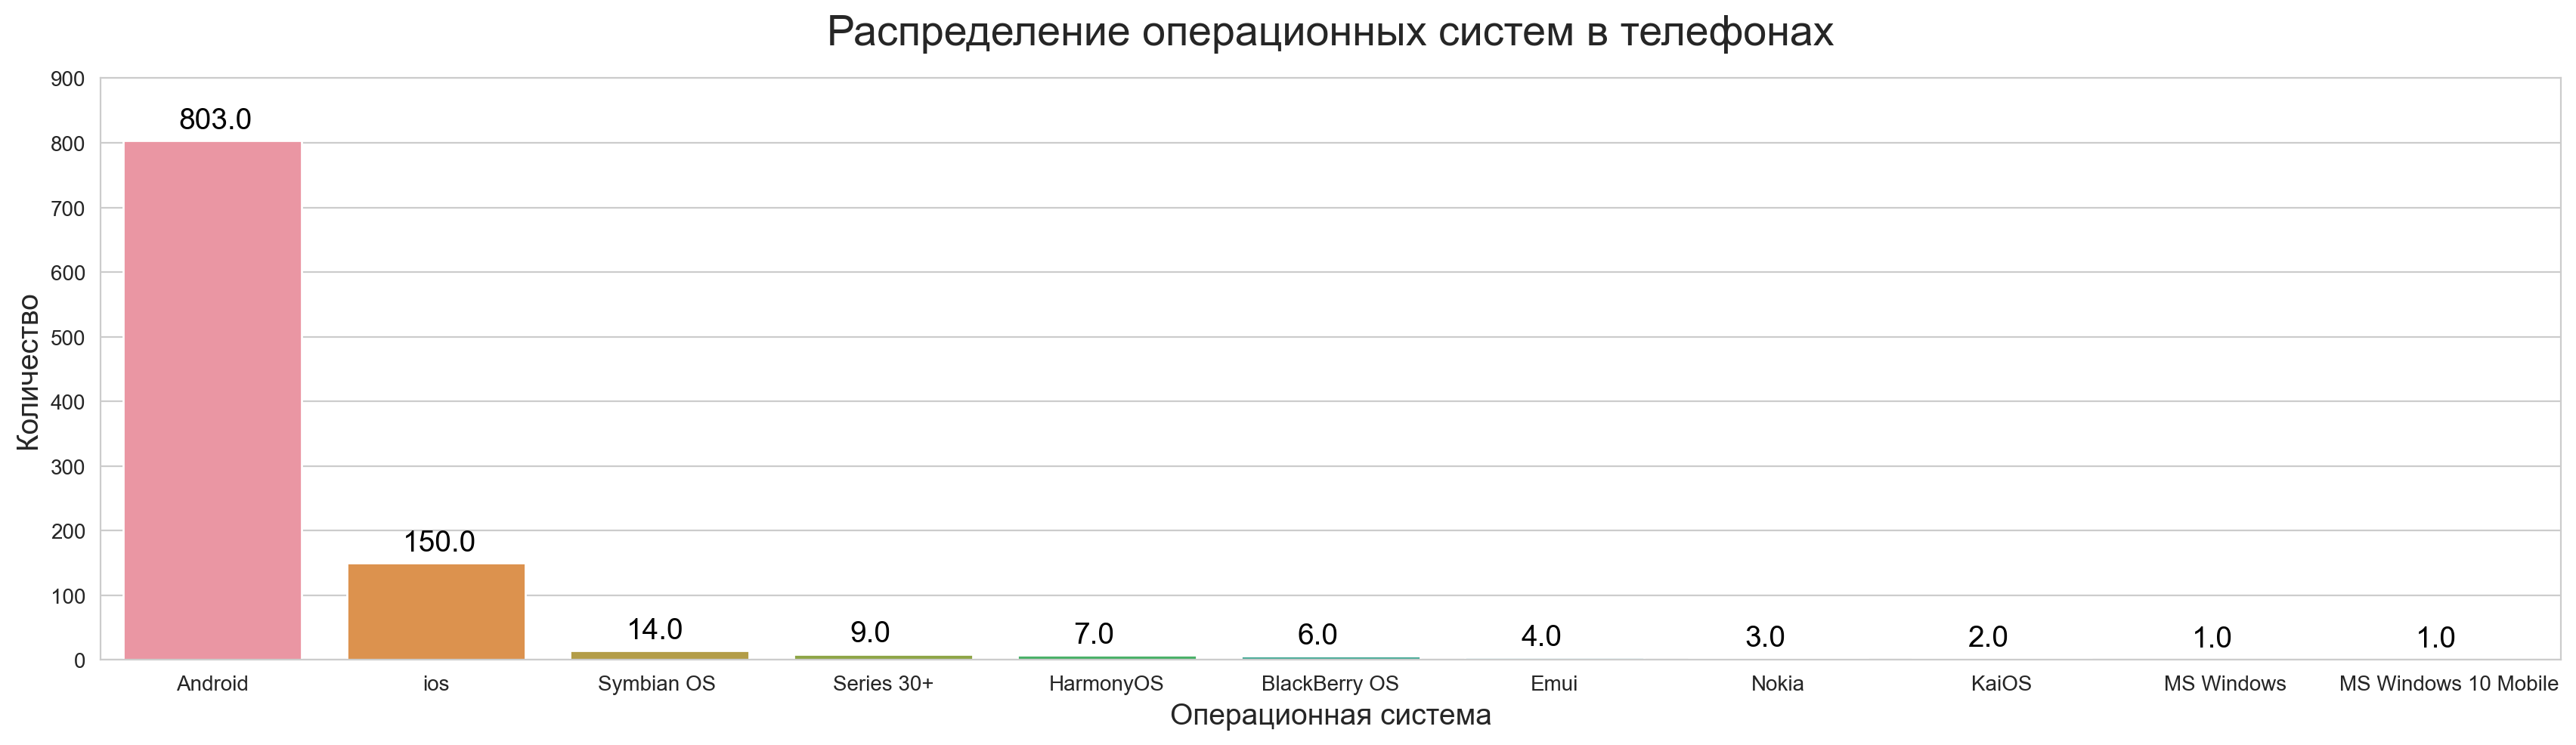

In [499]:
plt.figure (figsize = (21, 5))
fig = sns.countplot(x='Операционная система', data=df, order= df.groupby('Операционная система').
                                                        size().sort_values(ascending = False).index)
plt.title ('Распределение операционных систем в телефонах', pad = 16, fontsize = 20)
plt.ylabel('Количество', fontsize = 14)
plt.xlabel('Операционная система', fontsize = 14)
plt.ylim(0,900)
for l in fig.patches:
    fig.annotate(l.get_height(), (l.get_x()+0.25, l.get_height()+19), color='black', size=14)

Итак, чаще всего в телефонах встречается операционная система АНДРОИД (как было упомянуто выше). Операционная система IOS встречается всего у 150 моделей (так как это опреационная система стоит только у моделей APPLE). Далее по поуплярности идет операционка SYMBAIN OS (у 14 моделей). И только по 1 моделе относится к разным версиям операционной системы WINDOWS.

Я еще ни разу не встречала мобильный телефон с операционкой WINDOWS, давайте посмотрим, что это за телефоны:

In [500]:
df[(df['Операционная система'] == 'MS Windows') | (df['Операционная система'] == 'MS Windows 10 Mobile')]

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда
332,Acer Liquid M330,9161,MS Windows 10 Mobile,8.0,8.0,4.5,пластик,120.0,черный,142.0,41.0
367,Archos 40 Cesium,4057,MS Windows,4.0,4.0,4.0,пластик,120.0,черный,126.0,41.0


Таким образом, эту операционку имеют телефоны под названием **"Acer Liquid M330"** и **"Archos 40 Cesium"**. При чем эти телефоны из достаточно дешевого сегмента: их цена составляет всего 9161 рублей и 4057 рублей соотвественно.

Также интрес вызывают операциооные системы **SYMBIAN OS, SERIES 30+, HARMONY OS**, так как никогда не слышала про эти операционки. Давайте посмотрим, к каким моделям они относятся:

In [501]:
df[df['Операционная система'] == 'Symbian OS ']

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда
468,Nokia E72,8700,Symbian OS,1.0,0.250,2.36,сталь и пластик,120.0,белый,128.0,90.0
519,Nokia 5800,6500,Symbian OS,1.0,0.014,3.20,пластик,120.0,красный,109.0,41.0
520,Nokia 5800,6500,Symbian OS,1.0,0.014,3.20,пластик,120.0,черный,109.0,41.0
532,Nokia E90,25480,Symbian OS,1.0,0.128,6.53,пластик,120.0,черный,210.0,41.0
535,Nokia N95,8500,Symbian OS,8.0,8.000,2.80,пластик,120.0,черный,128.0,41.0
536,Nokia E71,8500,Symbian OS,1.0,128.000,2.36,сталь и пластик,120.0,черный,190.0,41.0
537,Nokia E71,8500,Symbian OS,1.0,128.000,2.36,сталь и пластик,120.0,белый,190.0,41.0
538,Nokia E52,8500,Symbian OS,1.0,0.128,2.40,алюминий и пластик,120.0,черный,98.0,41.0
539,Nokia E52,8500,Symbian OS,1.0,0.128,2.40,алюминий и пластик,120.0,белый,98.0,41.0
540,Nokia E52,8500,Symbian OS,1.0,0.128,2.40,алюминий и пластик,120.0,бронзовый,98.0,41.0


Ага, эту операционку имеют Нокиа. Идем дальше:

In [502]:
df[df['Операционная система'] == 'Series 30+']

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда
459,Nokia 105 DS,899,Series 30+,8.0,0.004,1.7,поликарбонат,60.0,черный,74.0,58.0
465,Nokia 2660 DS LUSH,7975,Series 30+,1.0,0.128,2.8,пластик,120.0,зеленый,123.0,120.0
473,Nokia 2660 DUAL SIM,3102,Series 30+,1.0,0.128,2.8,пластик,120.0,красный,123.0,120.0
474,Nokia 2660 DUAL SIM,3300,Series 30+,1.0,0.128,2.8,пластик,120.0,черный,123.0,120.0
479,Nokia 2660,2435,Series 30+,1.0,0.002,2.8,пластик,120.0,черный,123.0,120.0
482,Nokia 105 DUAL SIM,2290,Series 30+,8.0,0.004,1.7,пластик,120.0,синий,70.0,41.0
483,Nokia 2660,6990,Series 30+,1.0,0.128,2.8,пластик,120.0,розовый,123.0,120.0
484,Nokia 2660,6990,Series 30+,1.0,0.128,2.8,пластик,120.0,темно-синий,123.0,120.0
510,Nokia 125 DS,1476,Series 30+,8.0,0.004,2.4,пластик,120.0,черный,91.0,41.0


АГА, это операционка тоже относится к Нокиа. Какой у нас Нокиа разностаронний :) 

Идем дальше:

In [503]:
df[df['Операционная система'] == 'HarmonyOS']

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда
250,Huawei P60 Pro,58528,HarmonyOS,8.0,512.0,6.67,металл и стекло,120.0,черный,200.0,41.0
253,Huawei nova 12SE,23104,HarmonyOS,8.0,256.0,6.67,пластик,90.0,черный,186.0,41.0
255,Huawei P60,48965,HarmonyOS,8.0,256.0,6.67,металл и стекло,120.0,черный,197.0,41.0
260,Huawei P60 Pro,67622,HarmonyOS,8.0,512.0,6.67,металл и стекло,120.0,белый,200.0,41.0
263,Huawei nova 12SE,23598,HarmonyOS,8.0,256.0,6.67,пластик,90.0,зеленый,186.0,41.0
264,Huawei nova 12SE,23598,HarmonyOS,8.0,256.0,6.67,пластик,90.0,белый,186.0,41.0
267,Huawei P60,54330,HarmonyOS,8.0,256.0,6.67,металл и стекло,120.0,зеленый,197.0,41.0


А это уже у нас Хуавей, понятно! Буду знать теперь)

**МАТЕРИАЛ КОРПУСА**

Итак, посмотрим, из чего же чаще всего сделана основа телефона:

In [504]:
df['Материал корпуса'].describe(include='object')

count        1000
unique         15
top       пластик
freq          481
Name: Материал корпуса, dtype: object

Чаще всего материал телефона делают именно из **пластика**, при этом есть целых 15 уникальных комбинаций материалов. Давайте посмотрим на их распределение:

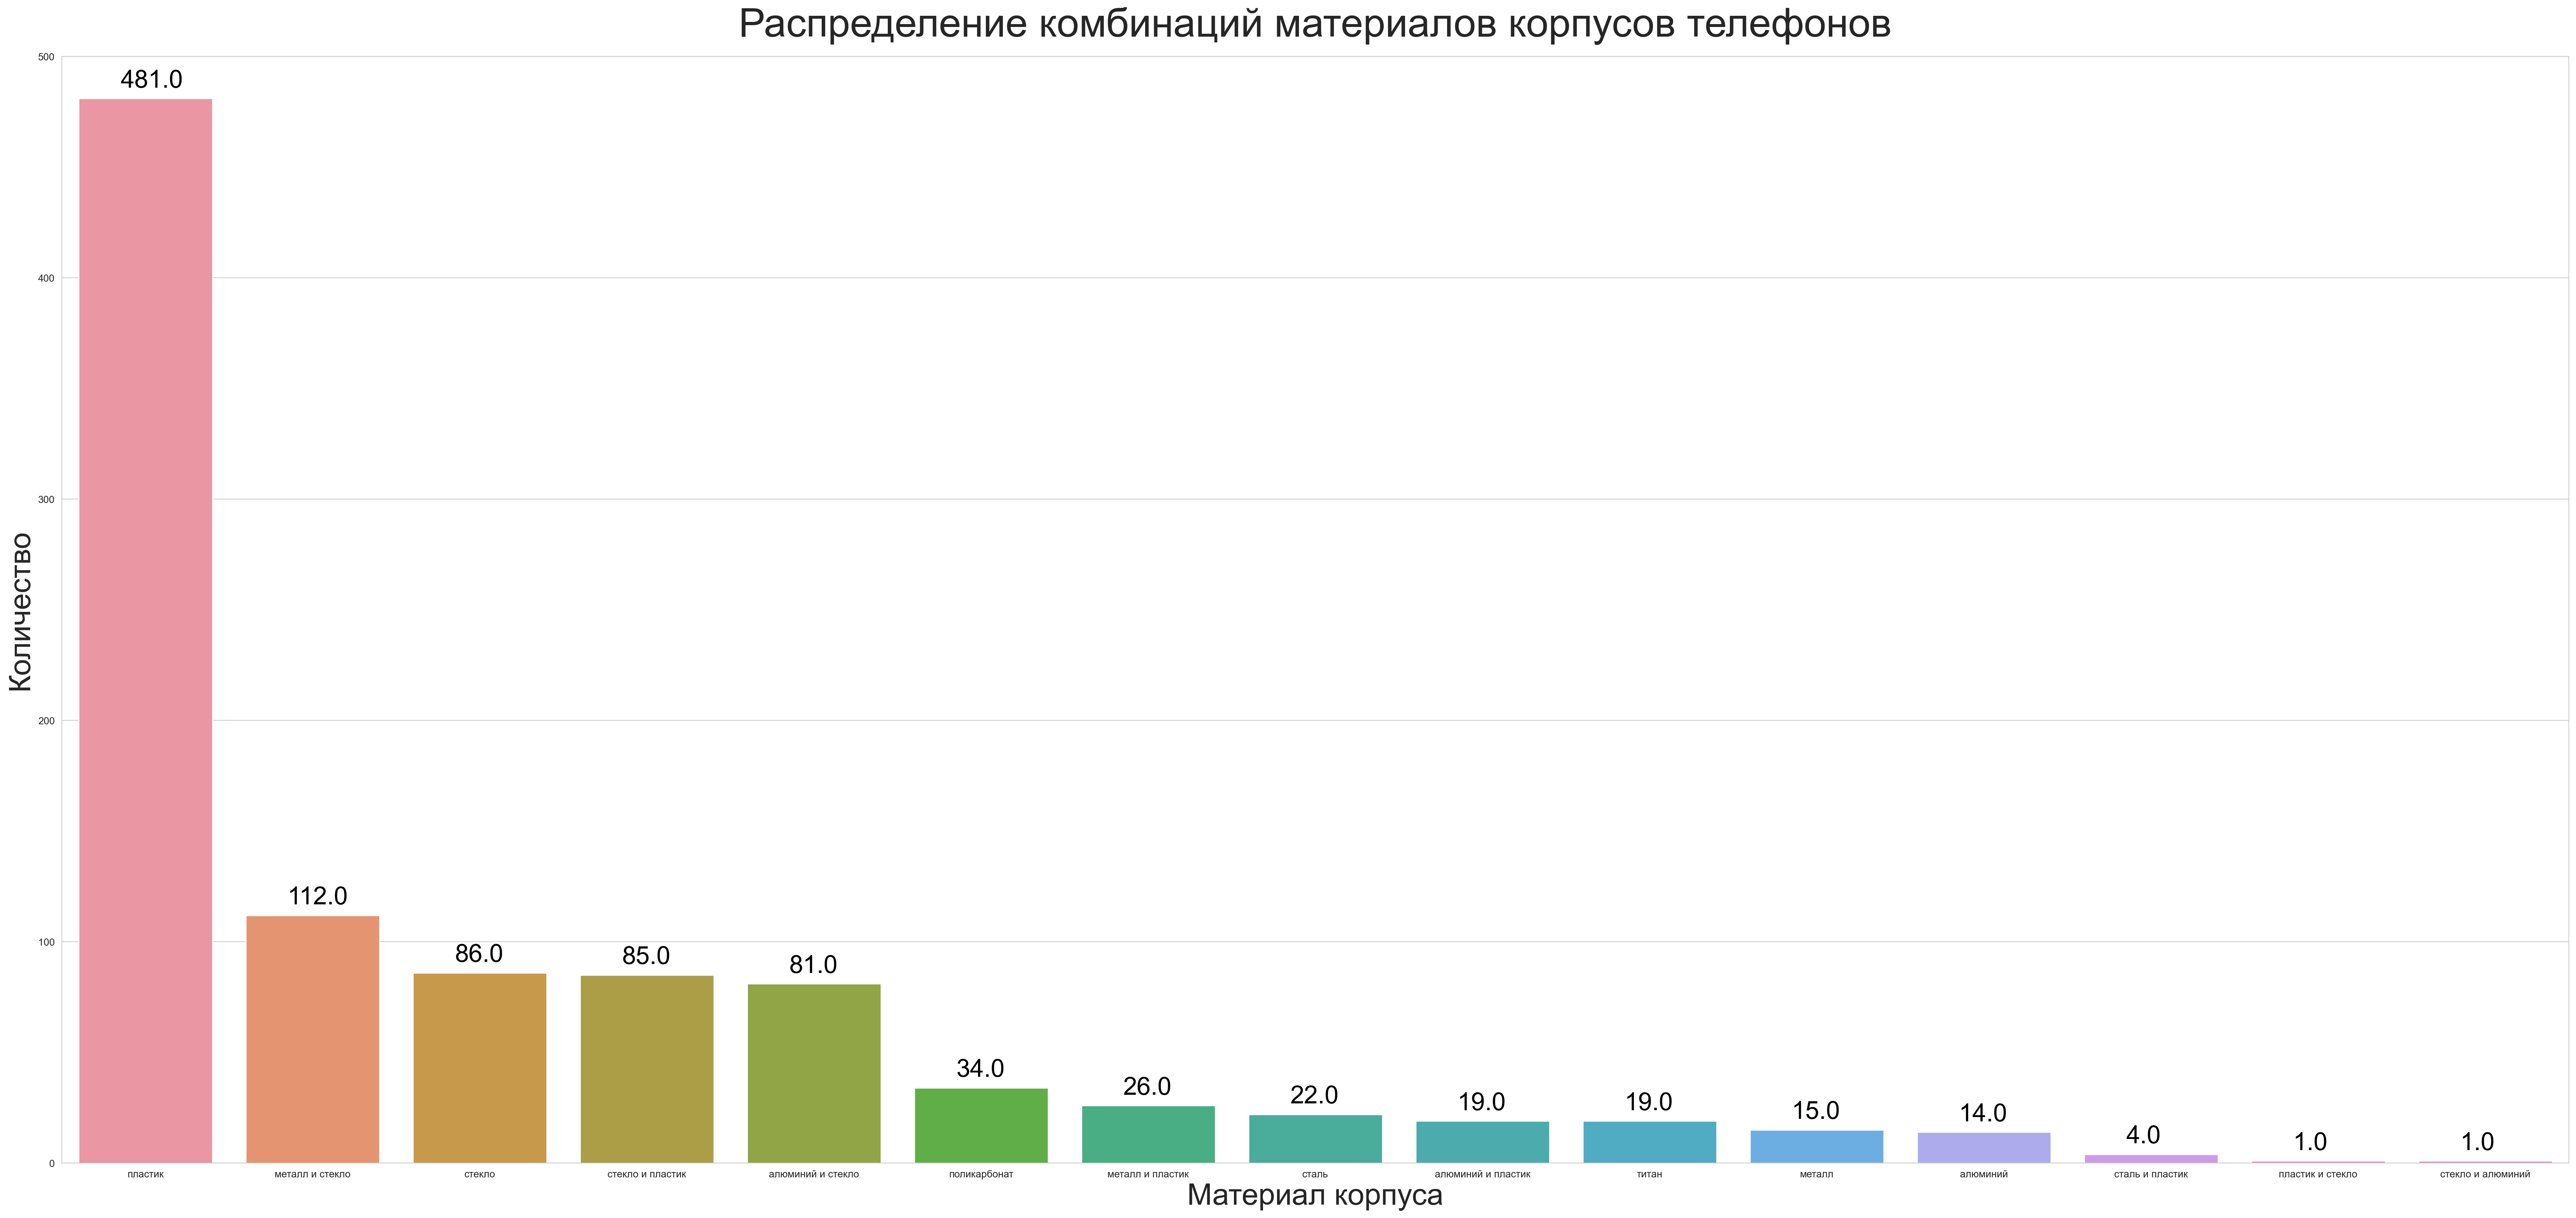

In [505]:
plt.figure (figsize = (45, 20))
fig = sns.countplot(x='Материал корпуса', data=df, order= df.groupby('Материал корпуса').
                                                        size().sort_values(ascending = False).index)
plt.title ('Распределение комбинаций материалов корпусов телефонов', pad = 20, fontsize = 40)
plt.ylabel('Количество', fontsize = 30)
plt.xlabel('Материал корпуса', fontsize = 30)
plt.ylim(0,500)
for l in fig.patches:
    fig.annotate(l.get_height(), (l.get_x()+0.25, l.get_height()+5), color='black', size=25)

Как уже было выяснено ранее наиболее популярный материал для корпуса - **пластик**, далее идет **металл и стекло**, **стекло и пластик, поликаронат (очень неожидано)**, наименее же поппулярные материалы: **сталь и пластик**. Посмотрим, какие модели имеют менее популярные материалы:

In [506]:
df[(df['Материал корпуса'] == 'сталь и пластик')]

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда
343,AGM G2 Guardian,104477,Android,8.0,256.00,6.58,сталь и пластик,120.0,черный,405.0,41.0
468,Nokia E72,8700,Symbian OS,1.0,0.25,2.36,сталь и пластик,120.0,белый,128.0,90.0
536,Nokia E71,8500,Symbian OS,1.0,128.00,2.36,сталь и пластик,120.0,черный,190.0,41.0
537,Nokia E71,8500,Symbian OS,1.0,128.00,2.36,сталь и пластик,120.0,белый,190.0,41.0


АГА, из этого материала делают наши любимые Нокиа! И какой-то непонятный телефон "AGM G2 Guardian"

**ЦВЕТ**

Вообще при покупке телефона очень многие обращают внимание на цвет (особенно девочки :) ), поэтому давайте посмотрим, что у нас популярно:

In [507]:
df['Цвет'].describe(include='object')

count       1000
unique        29
top       черный
freq         331
Name: Цвет, dtype: object

Итак, можно заметить, что наиболее популярный цвет **черный** - в приницпе ожидаемое, потому что этот цвет подходит как для мужчин, так и для женщин! При этом у нас есть целых 28 вариаций цветов! Давайте посмотрим на это распределение:

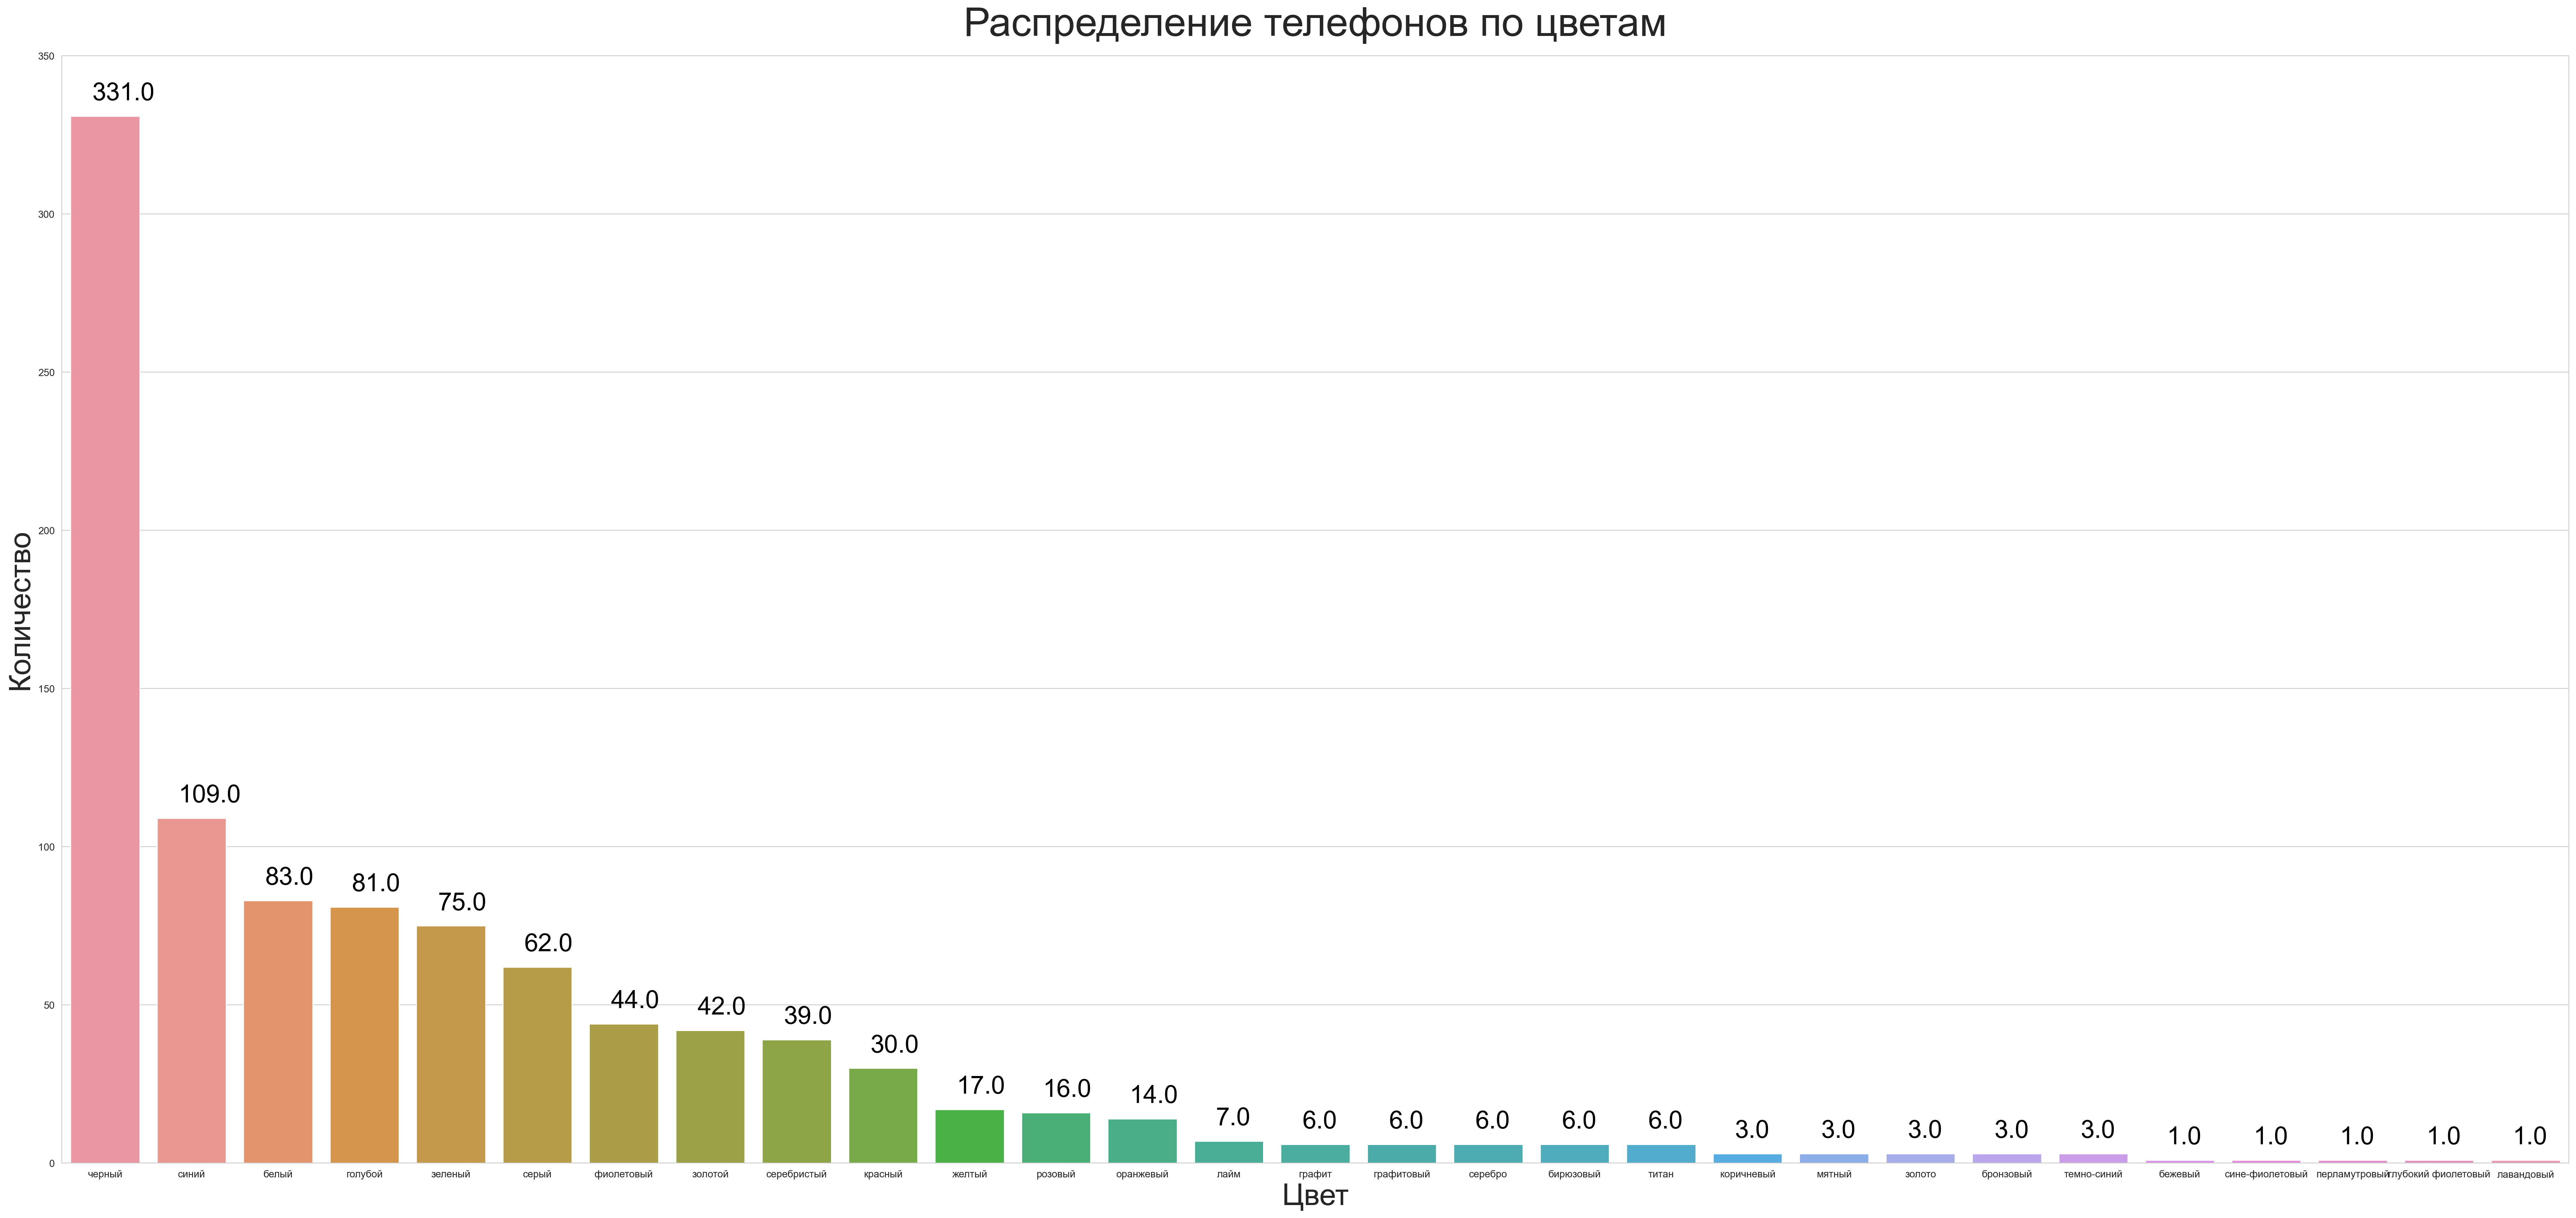

In [508]:
plt.figure (figsize = (45, 20))
fig = sns.countplot(x='Цвет', data=df, order= df.groupby('Цвет').
                                                        size().sort_values(ascending = False).index)
plt.title ('Распределение телефонов по цветам', pad = 20, fontsize = 40)
plt.ylabel('Количество', fontsize = 30)
plt.xlabel('Цвет', fontsize = 30)
plt.ylim(0,350)
for l in fig.patches:
    fig.annotate(l.get_height(), (l.get_x()+0.25, l.get_height()+5), color='black', size=25)

Итак, самый популярный у нас цвет - **ЧЕРНЫЙ** (у целых 331 модели этот цевт), далее по популярности идет **синий (109 телефонов), белый (83 телефона), голубой (81 телефон)**, самые же непопулярные цвета телефонов: **лавандовый, глубокий фиолетовый, перламутровый, сине-фиолетовый, бежевый** - возможно они у нас встречаются по 1 разу из-за необычности названия. Почему нельзя просто написать *фиолетовый* и жить спокойно?) Вы когда-нибудь вообще видели бежевый телефон?)

Давайте посмотрим, какие именно **бренды телефонов** придумали такие названия:

In [509]:
df[(df['Цвет'] == 'лавандовый') | (df['Цвет'] == 'глубокий фиолетовый') | (df['Цвет'] == 'пердамутровый') | (df['Цвет'] == 'сине-фиолетовый') | (df['Цвет'] == 'бежевый')]

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда
35,IPhone 14 Pro Max,114916,ios,6.0,128.0,6.70,металл и стекло,120.0,глубокий фиолетовый,240.0,30.0
239,Honor 20S,9102,Android,8.0,128.0,6.15,металл и стекло,60.0,сине-фиолетовый,165.0,41.0
530,Nokia 6500,7500,Android,1.0,1.0,2.00,алюминий и пластик,120.0,бежевый,94.0,41.0
555,Nokia G21,17999,Android,8.0,128.0,6.50,поликарбонат,90.0,лавандовый,190.0,41.0


Итак, место за **"Самые необычные названия"** получают АЙФОН, НОКИА И ХОНОР! Теперь я хочу увидеть бежевый НОКИА!!!

### Анализируем, что же как влияют друг на дурга разные признаки

Тепепь посмотрим на распределение цены телефонов и проанализируем, есть ли какие-либо закономерности.

**NUMERICAL DATA**

Text(0.5, 0, 'Цена телефона')

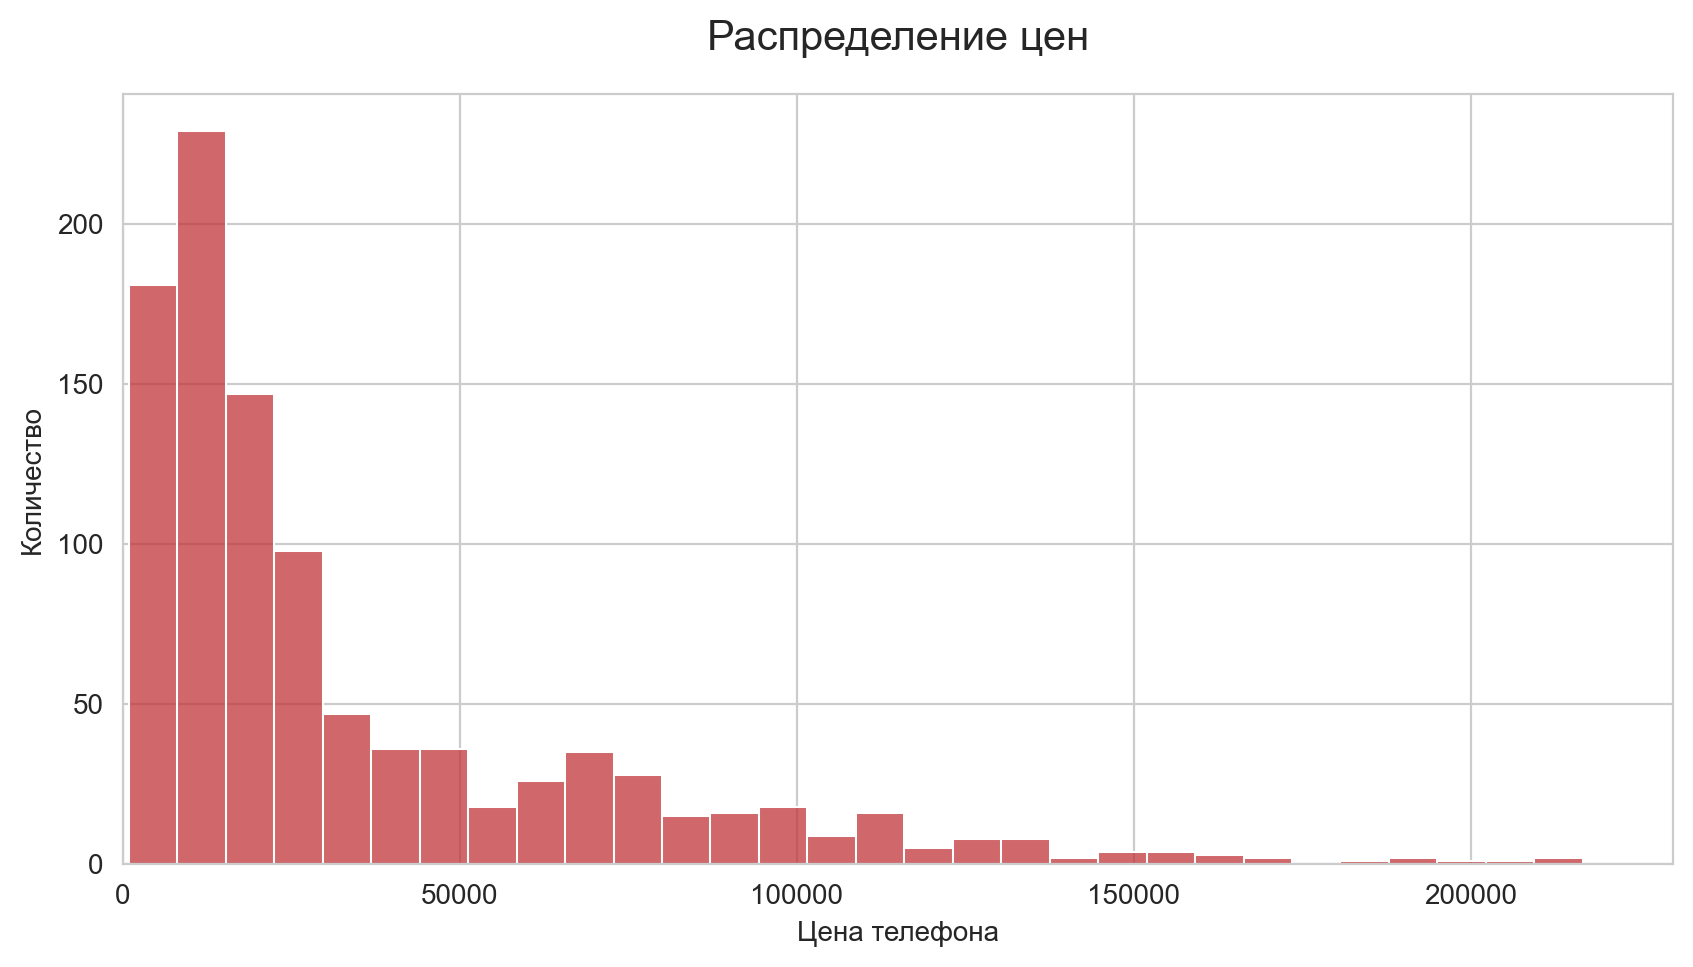

In [510]:
plt.figure (figsize = (10, 5))
sns.histplot(df['Цена'])
plt.xlim(0, 230000)
plt.title ('Распределение цен', pad = 16, fontsize = 15)
plt.ylabel('Количество', fontsize = 10)
plt.xlabel('Цена телефона', fontsize = 10)

Распределение цены выглядит смещенно, цена большинства телефонов находится в диапозоне до 50 000 рублей. Однако также есть выбросы: есть телефоны. которые смоят больше 200 000 рублей

Чтобы сгладить данные и выбросы, прологорифмируем цены:

Text(0.5, 0, 'Логарифм цены телефона')

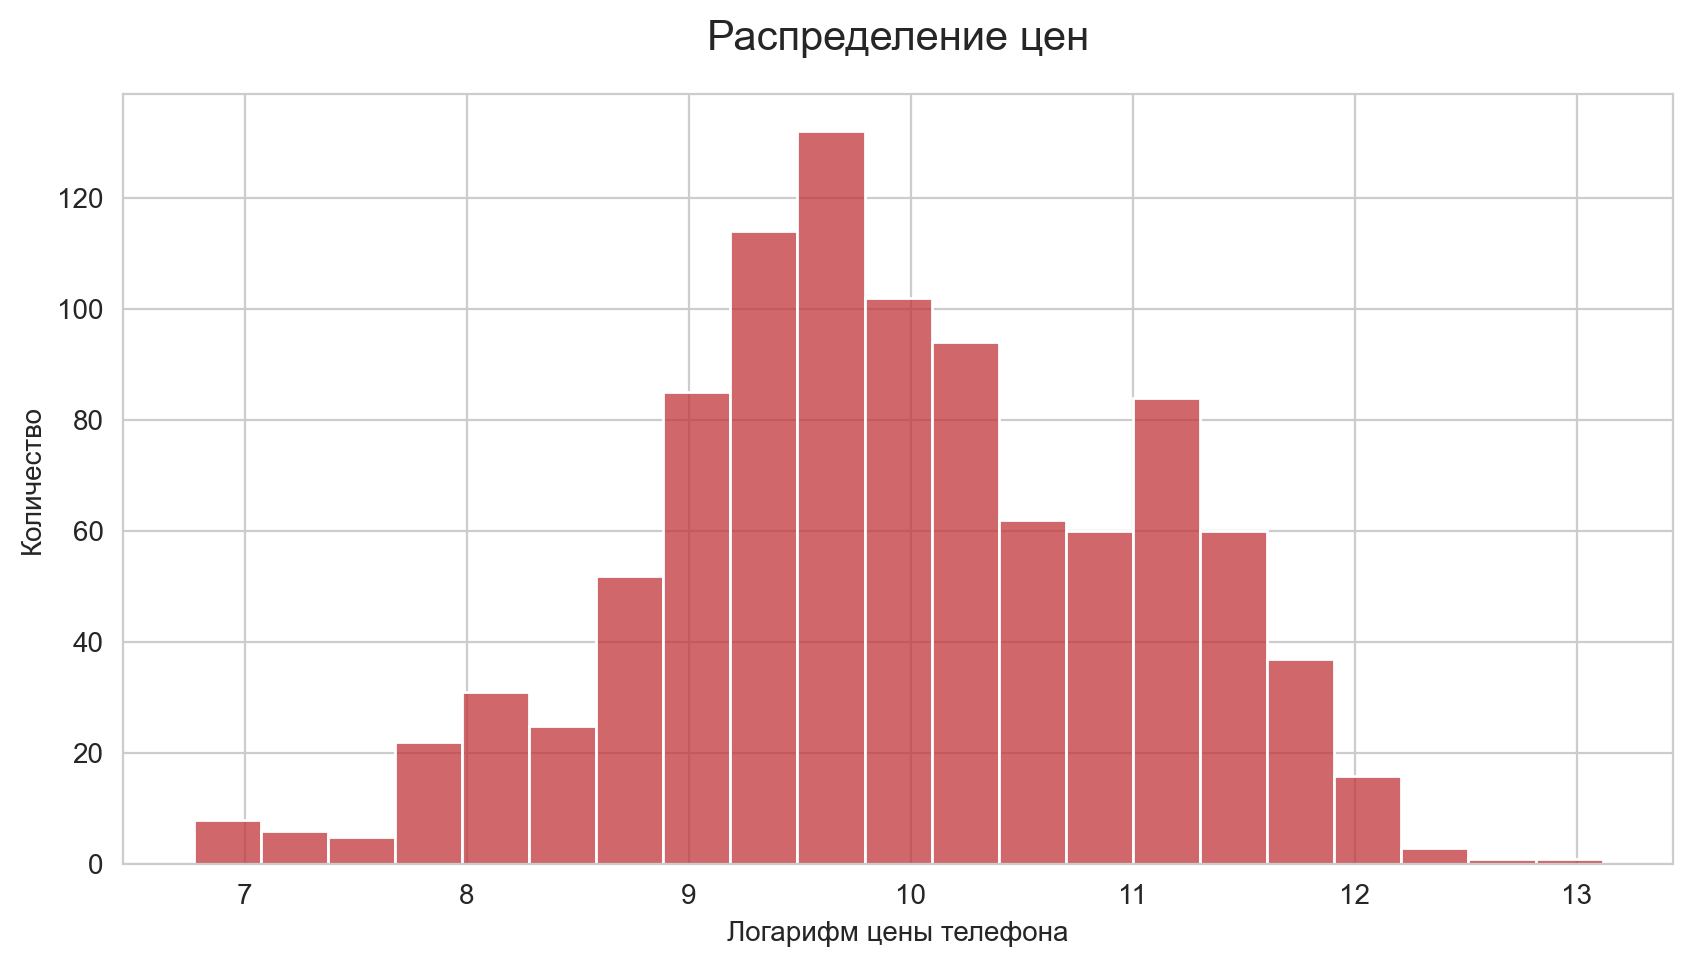

In [511]:
plt.figure (figsize = (10, 5))
sns.histplot(df['Цена'].apply(lambda x: np.log(x+1)))
plt.title ('Распределение цен', pad = 16, fontsize = 15)
plt.ylabel('Количество', fontsize = 10)
plt.xlabel('Логарифм цены телефона', fontsize = 10)

Распределение цена похоже на нормальное распреедление, но это нужно проверить, проанализировав график **КВАНТИЛЬ-КВАНТИЛЬ**:

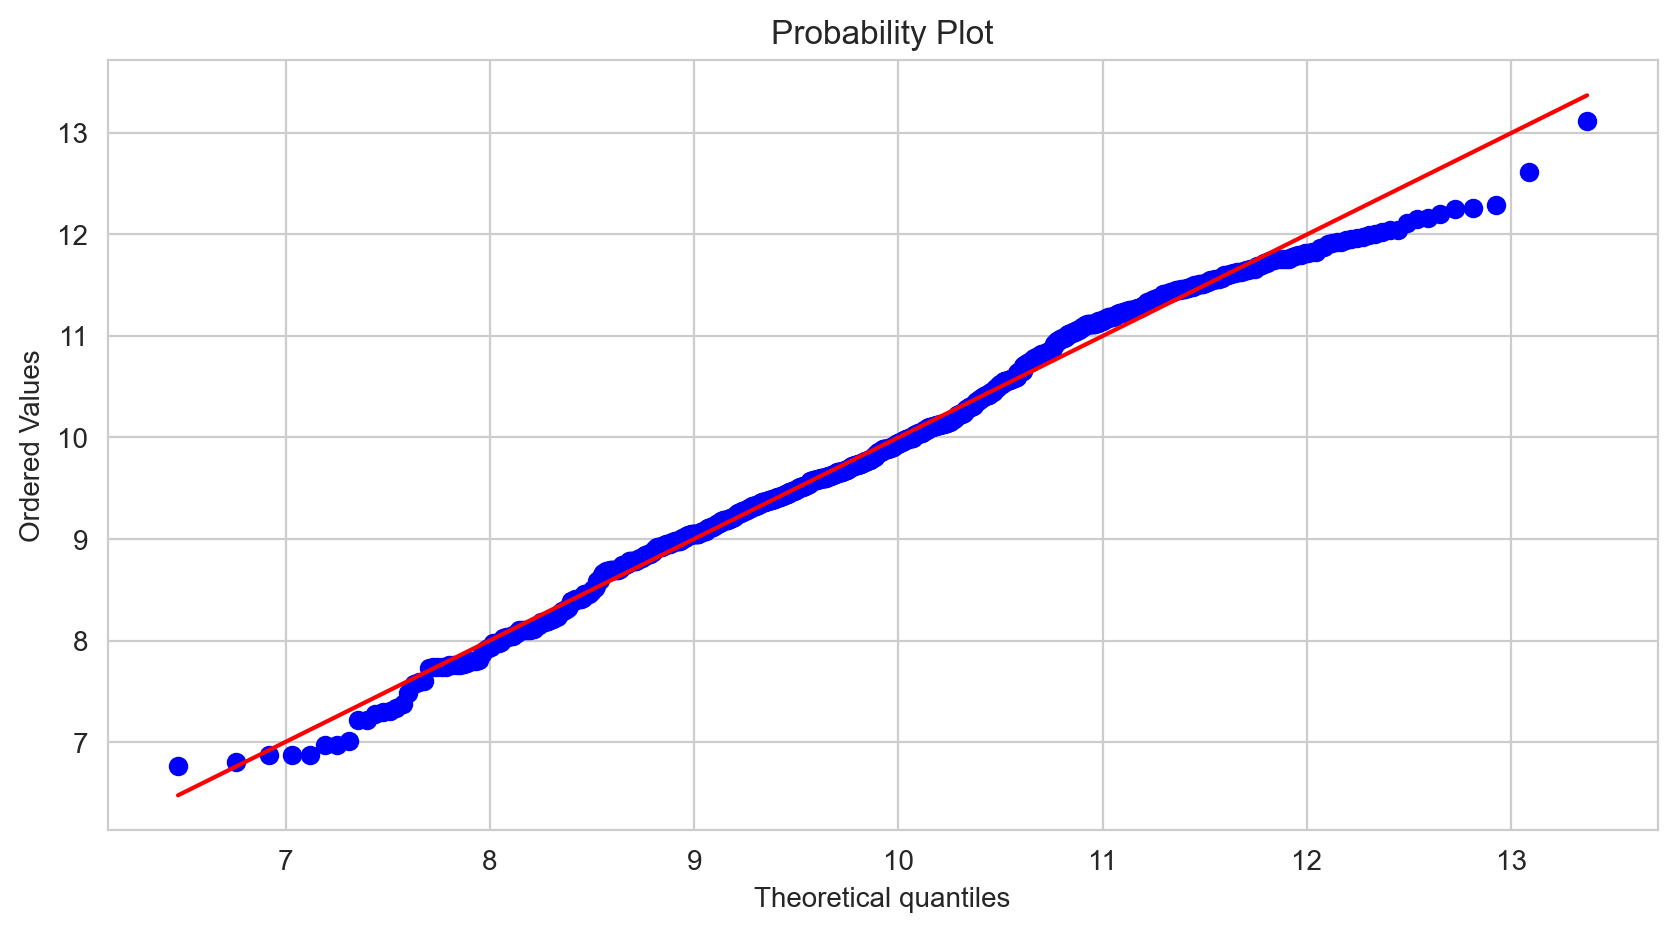

In [512]:
plt.figure (figsize = (10, 5))
ax = plt.subplot()
x = df['Цена'].apply(lambda x: np.log(x+1)).values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot = ax);

Можно заметить, что распределение логарифма цены действительно близко к нормальному, только хвосты отклоняются от этого значения (верхний конец отклоняется очень сильно)

Далее давайте рассмотрим, что же в большей степени влияет на **ЦЕНУ**. Рассмотрим корреляцию:

In [513]:
df.corr(numeric_only=True)['Цена']

Цена                              1.000000
Количество ядер процессора        0.055553
Встроенная память (ГБ)            0.642615
Экран                             0.317791
Частота обновления экрана (ГЦ)    0.195324
Вес                               0.253513
Время заряда                     -0.157555
Name: Цена, dtype: float64

Итак, самую большую корреляцию с ценой имеют:

**ВСТРОЕННАЯ ПАМЯТЬ** - это и логично, так как в приницпе чем больше память, тем выше цена (корреляция положительная). Да и вообще люди часто смотрят на память, когда покупают телефон.

**ЭКРАН** - ООЧЕНЬЬ неожидано, я вообще никогда не смотрела на диагональ экрана ахаха :) Но значит производители поднимают цену (положительная корреляция).

**ЧАСТОТА ОБНОВЛЕНИЯ ЭКРАНА И ВЕС** - в меньшей степени влияют на цену (но корреляция положительная)

**КОЛИЧЕСТВО ЯДЕР ПРОЦЕССОРА** - практически не влияет на цену (корреляция всего 0,06)

С **ВРЕМЕНЕМ ЗАРЯДА** наблюдается маленькая отрицательная корреляция: ну это и понятно, чем быстрее заряжается телефон, тем круче (но все равно корреляция не большая)

Давайте посмотрим на полную картину связи признаков:

<Axes: >

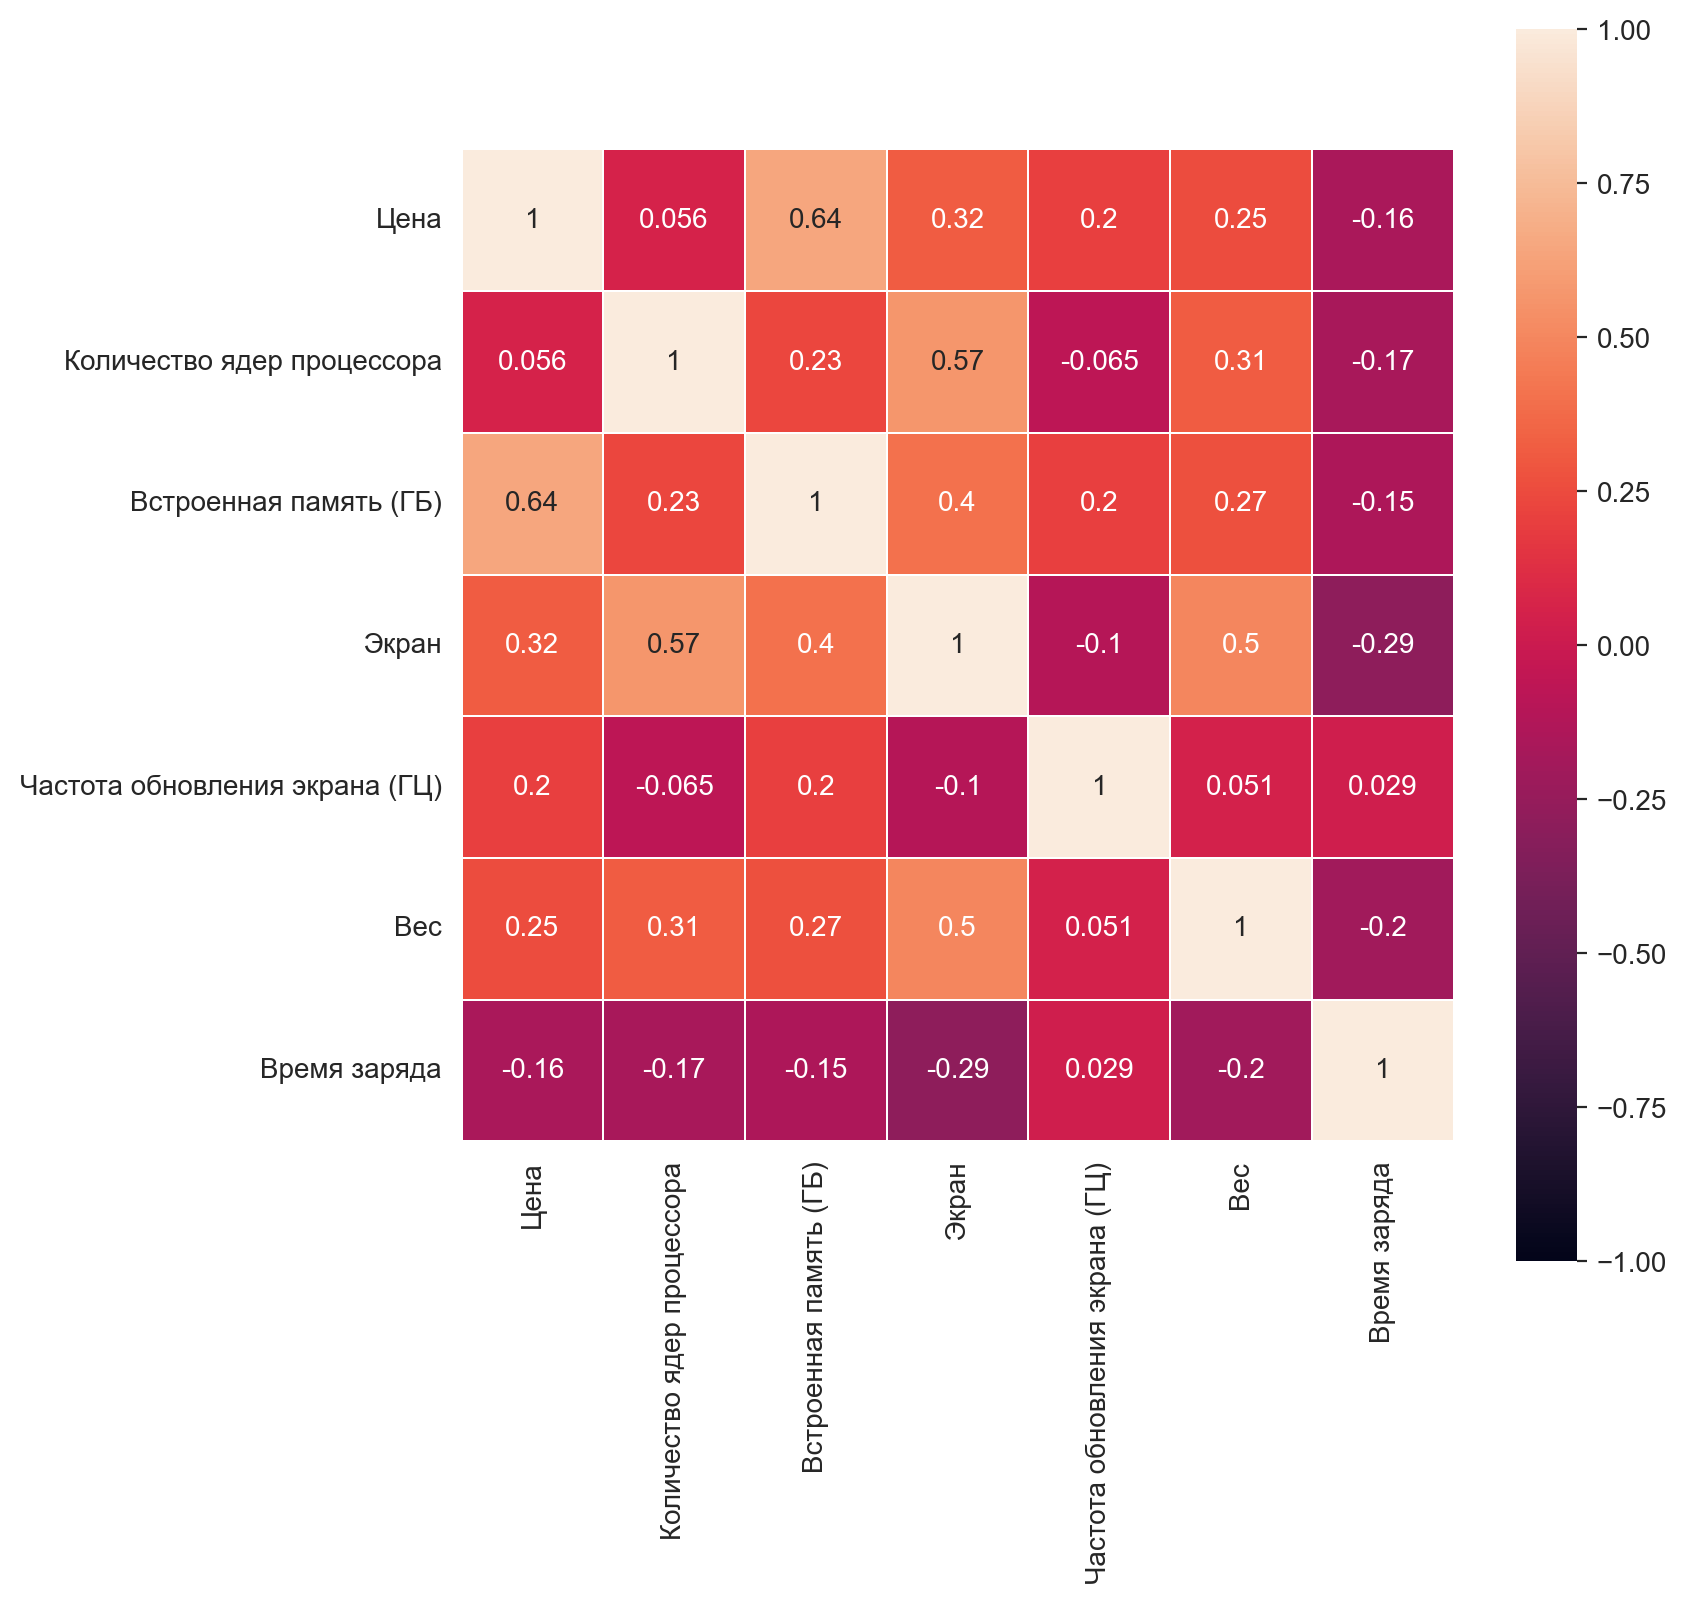

In [514]:
plt.figure(figsize = (8, 8))
s = df[df.select_dtypes([np.number]).columns.values].corr()
sns.heatmap(s, square=True,  annot=True, 
            linewidths=0.1, vmin=-1, vmax=1)

**Что здесь интерсного можно увидеть?**
1. На КОЛИЧСЕТВО ЯДЕР больше всего оказывает влияние ДИАГОНАЛЬ ЭКРАНА (корреляция 0,57) - досточно сильная корреляция
2. КОЛИЧСЕТВО ЯДЕР И ДИАГОНАЛЬ ЭКРАНА имеют отрицталеьную корреляцию с ВРЕМЕНЕМ ЗАРЯДА - чем больше телфон (и ядер соответсвенно в нем), тем быстрее он заряжается
4. ЧАСТОТА ОБНОВЛЕНИЯ ЭКРАНА имеет с каждым признаком маленькую положительную корреляцию(с ценой 0,2)
5. ВЕС очень сильно коррелируется с ЭКРАНОМ (это и понятно, чем больше телефон, тем больше вес)

Давайте попробуем визуализировать все эти взаимосвязи:

Начнем с взаимосвязи **цены и количество ядер**, однако стоит взять во внимание специфику признака **количество ядер**, так как он находится в определенном множистве (ранее про это говорилось), построим следубщий график:

Text(0.5, 1.0, 'Взаимосвязь между количеством ядер и ценой')

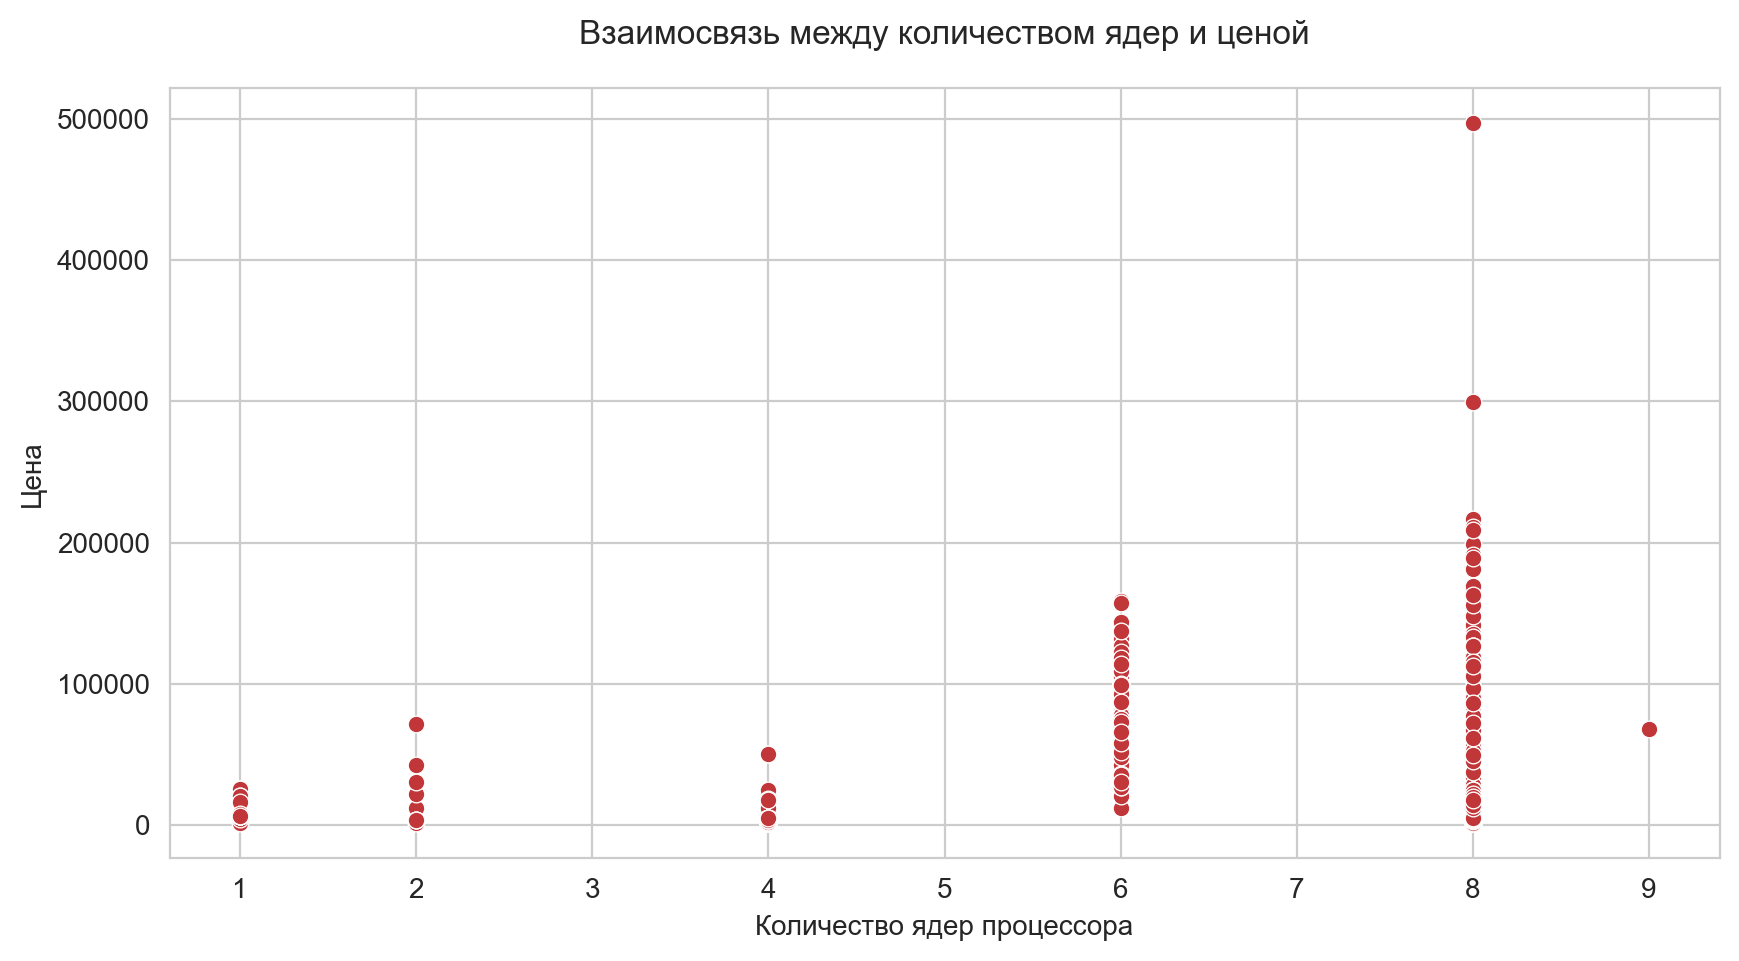

In [515]:
plt.figure (figsize = (10, 5))
sns.scatterplot(x = 'Количество ядер процессора', y = 'Цена', data = df)

plt.title('Взаимосвязь между количеством ядер и ценой', pad = 16)

В приниципе, не наблюдается янвой тенденции увеличения цены при увеличении ядер (только когла у телефона 9 ядер - цена значительно увеличивается). При этом самый дорогой телефон у нас имеет как раз 8 ядер (8 ядер - самый популярный показатель). Но попробуем это проинтерпритировать через график "Ящик с усами" - может это поможет лучше проследить границы:

Text(0.5, 1.0, 'Ящики с усами для вариации количества ядер процессора')

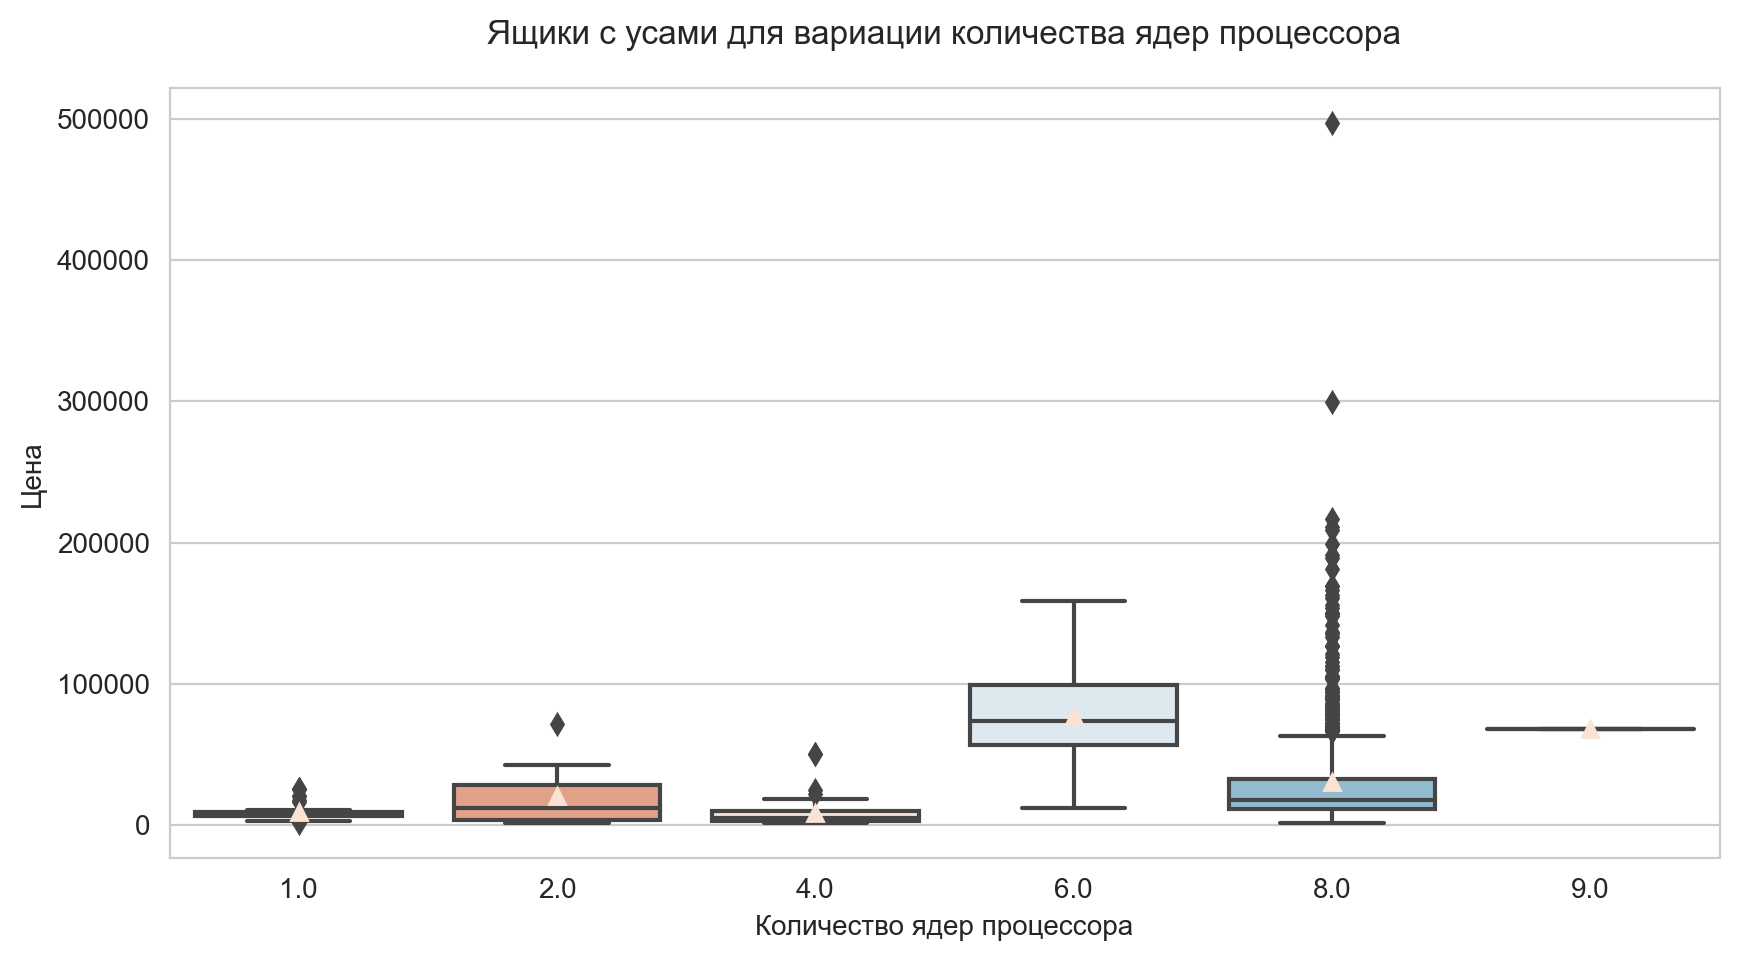

In [516]:
plt.figure (figsize = (10, 5))
sns.boxplot(x = 'Количество ядер процессора', y = 'Цена', data = df, showmeans=True)
plt.title('Ящики с усами для вариации количества ядер процессора', pad = 16)

Итак, можно вприницпе увидеть, что цена телефона при увеличении количества ядер растет (но незначительно - что подтверждает маленькая корреляция), при этом очень много выбросов наблюдается при 8 ядрах. Однако, пристутсвует положительная связь, как мы и увидели при подсчете корреляции.

**Визуализируем связь КОЛИЧЕСТВО ЯДЕР И ДИАГОНАЛЬ ЭКРАНА**

Text(0.5, 1.0, 'Взаимосвязь между диагональю экрана и количеством ядер')

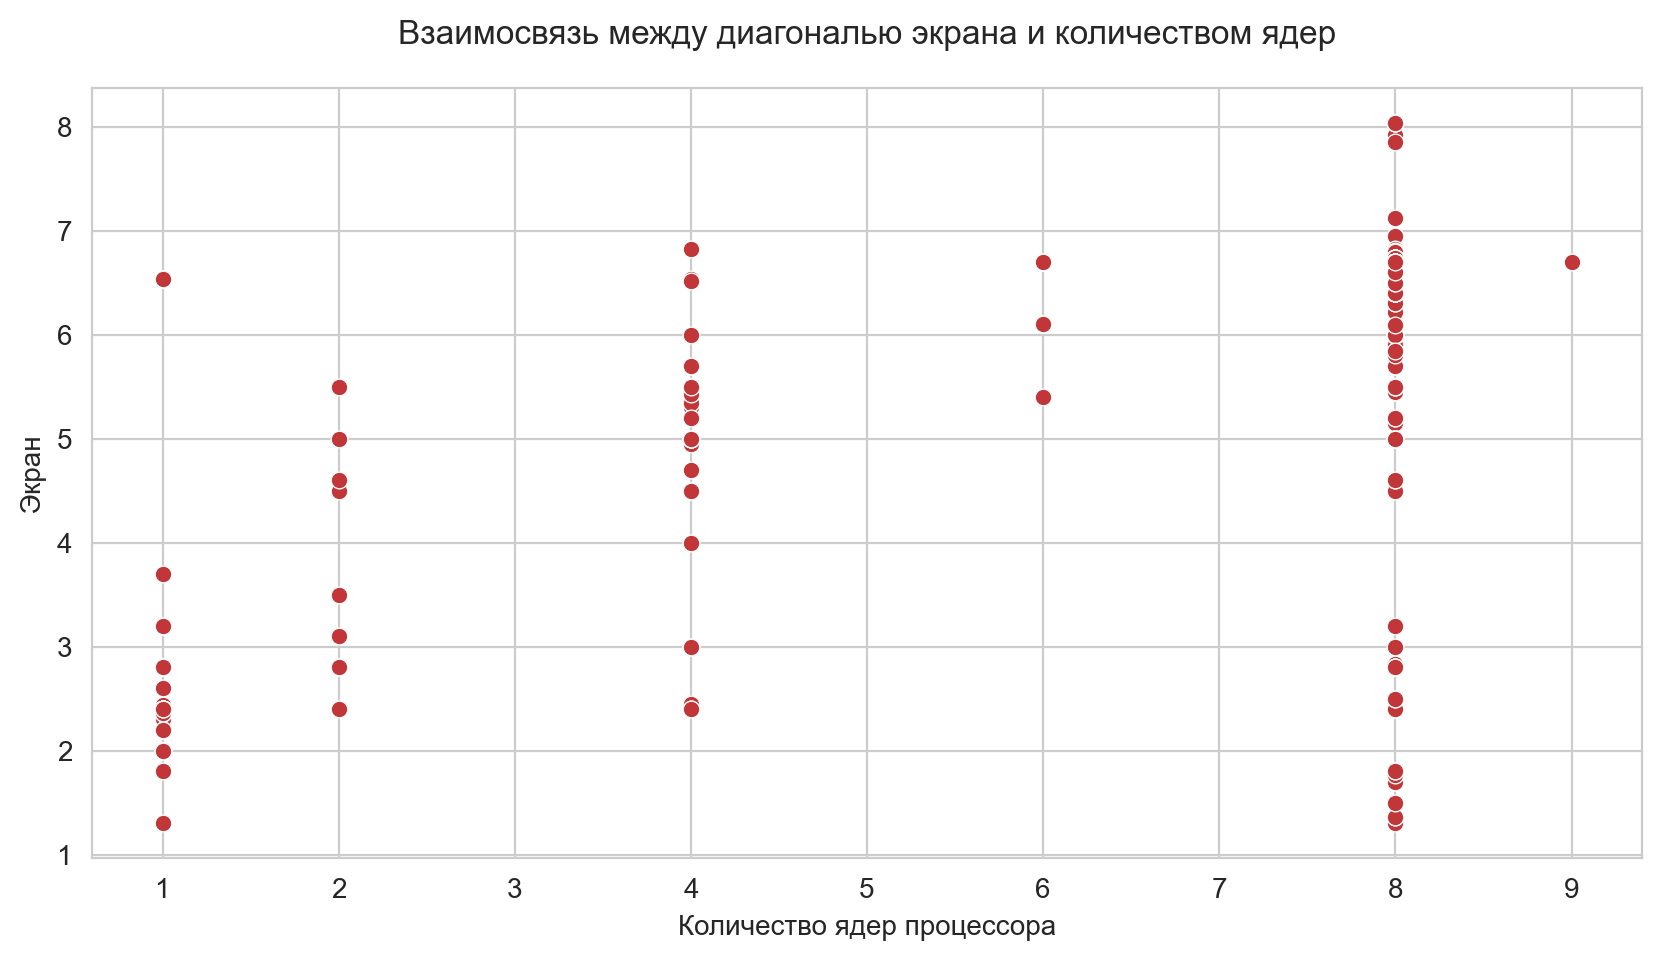

In [517]:
plt.figure (figsize = (10, 5))
sns.scatterplot(x = 'Количество ядер процессора', y = 'Экран', data = df)

plt.title('Взаимосвязь между диагональю экрана и количеством ядер', pad = 16)

Text(0.5, 1.0, 'Ящики с усами для вариации количества ядер процессора и экрана')

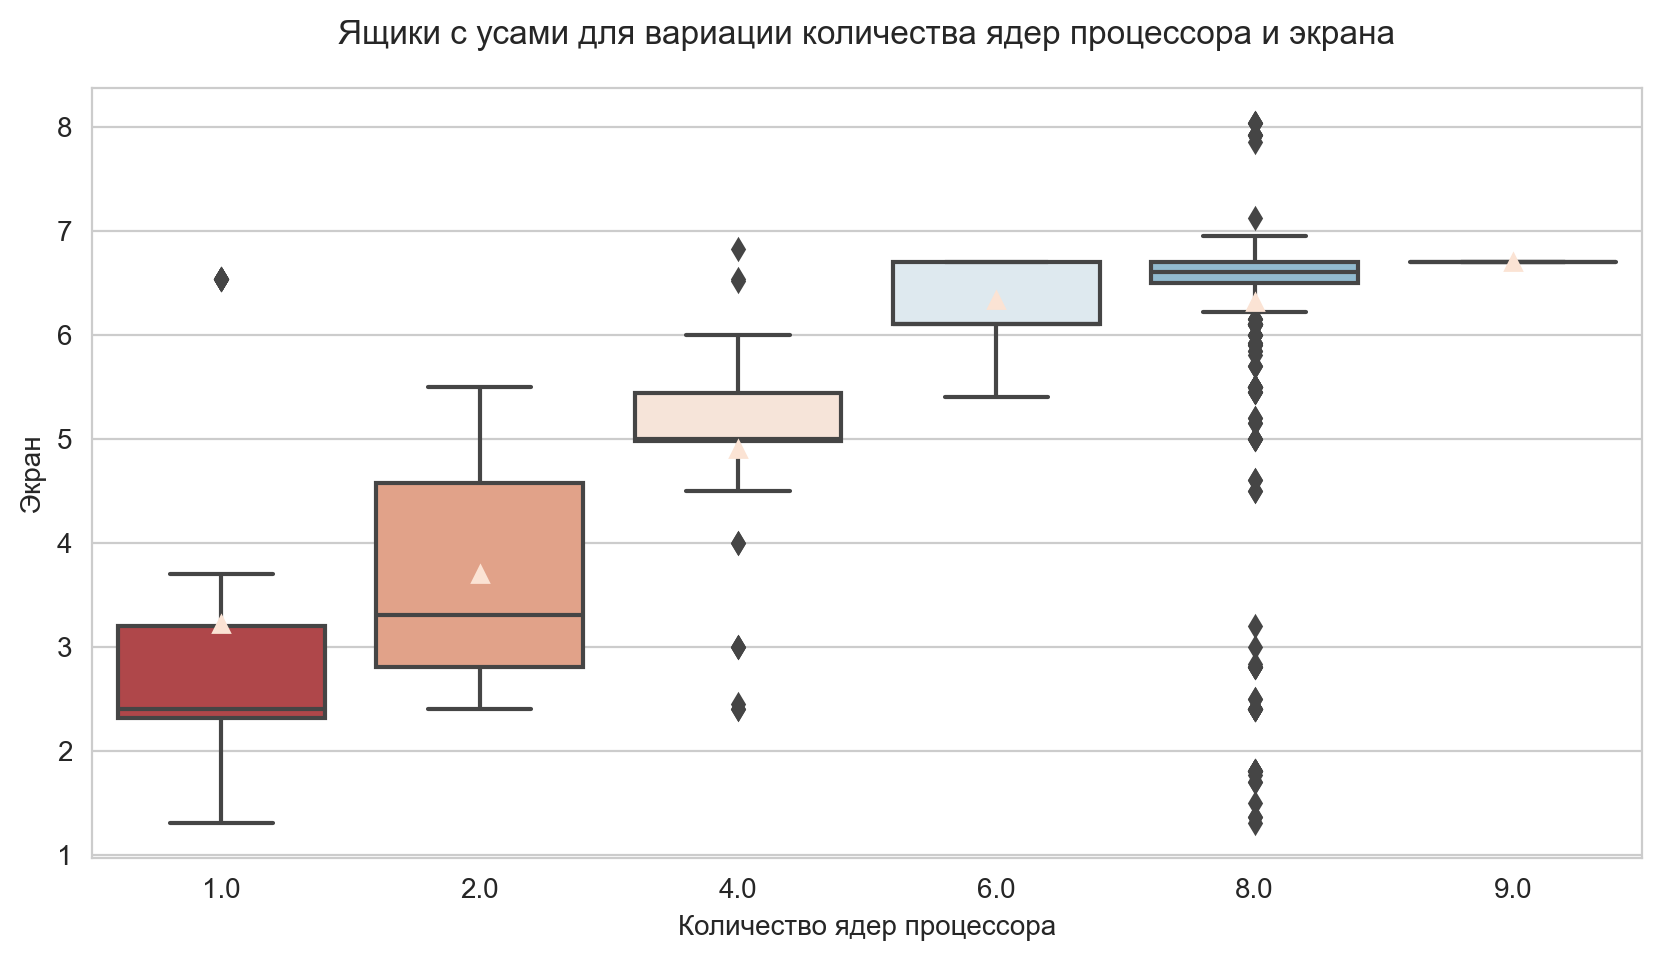

In [518]:
plt.figure (figsize = (10, 5))
sns.boxplot(x = 'Количество ядер процессора', y = 'Экран', data = df, showmeans=True)
plt.title('Ящики с усами для вариации количества ядер процессора и экрана', pad = 16)

Основываясь на этих двух графиках, действельно, наблюдается сильная положительная линейная взаимосвязь: чем больше ядер, тем больше экран. Однако, также видим множество выбросов, когда у телефона 8 ядер

**Взаимосвязь ЦЕНЫ И ВСТРОЕННОЙ ПАМЯТИ**

Для начала давайте рассмотрим распределение встроенной памяти:

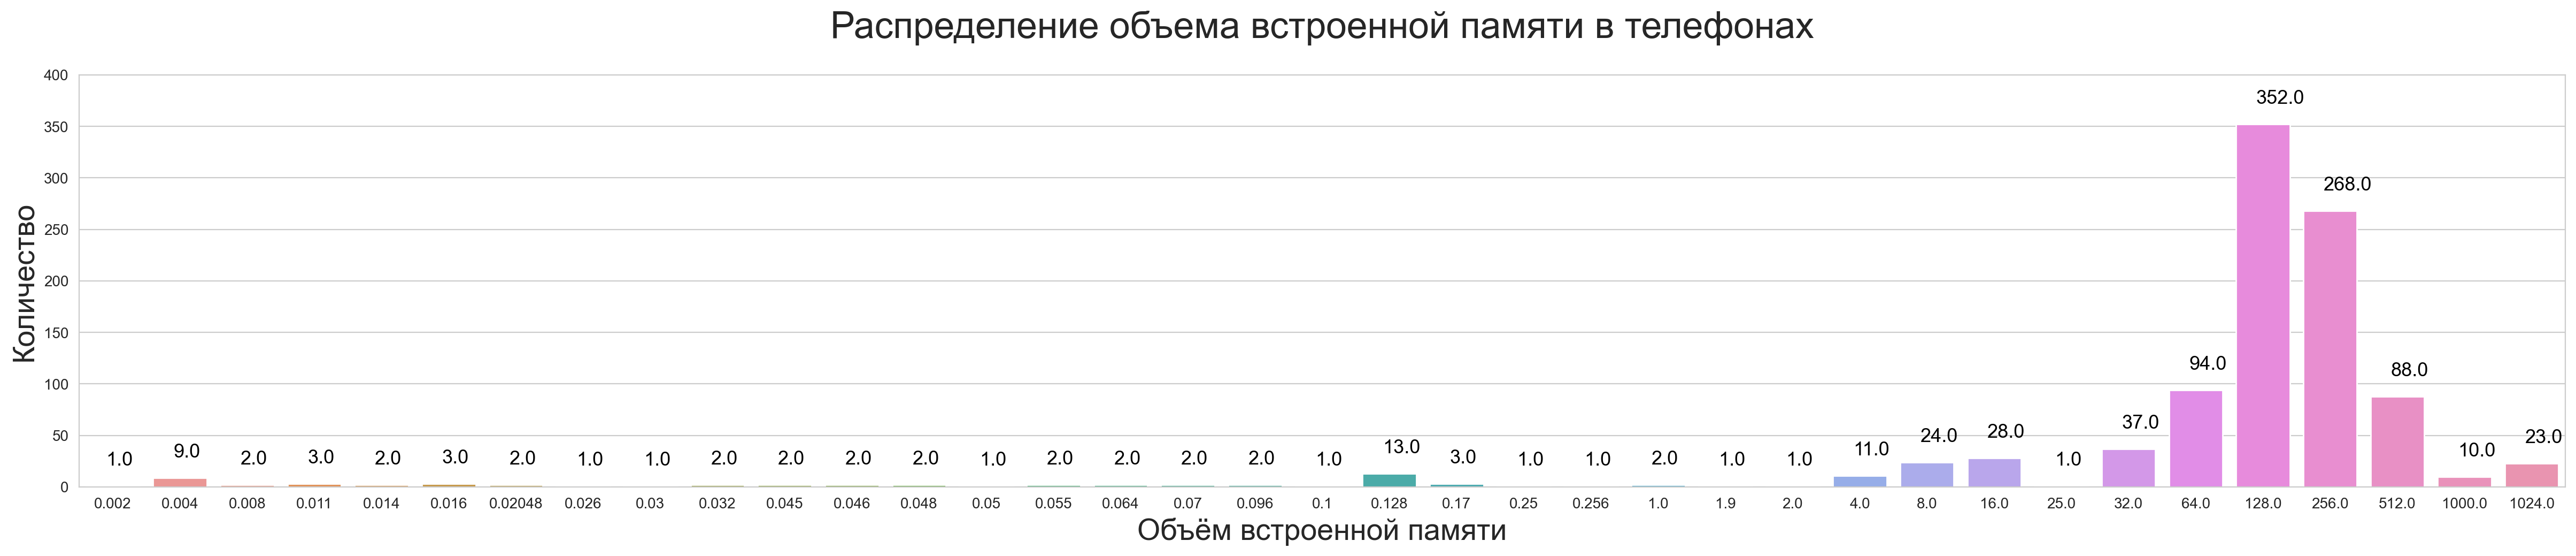

In [519]:
plt.figure (figsize = (30, 5))
fig = sns.countplot(x='Встроенная память (ГБ)', data=df)
plt.title ('Распределение объема встроенной памяти в телефонах', pad = 25, fontsize = 25)
plt.ylabel('Количество', fontsize = 20)
plt.xlabel('Объём встроенной памяти', fontsize = 20)
plt.ylim(0, 400)
for p in fig.patches:
    fig.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+20), color='black', size=13)

Такс, ну самая популярная встроенная память сейчас 128 ГБ (у 352 моделей), далее по популярности идет 256 ГБ (у 268 моделей), также есть похоже супер-мега-старые телефоны с памятью меньше ГБ  - думаю это страые БлэкБери или Нокиа:

In [520]:
df[df['Встроенная память (ГБ)'] < 1]

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда
457,Nokia 106,1990,Android,8.0,0.00400,1.80,пластик,100.0,черный,70.0,300.0
458,Nokia 130,3450,Nokia,8.0,0.00400,2.40,поликарбонат,120.0,темно-синий,98.0,120.0
459,Nokia 105 DS,899,Series 30+,8.0,0.00400,1.70,поликарбонат,60.0,черный,74.0,58.0
460,Nokia 3310 Dual Sim,3190,Nokia,1.0,0.02048,2.40,пластик,100.0,темно-синий,80.0,120.0
462,Nokia 7070 Prism Dual Sim,2900,Android,1.0,0.01100,1.80,пластик,120.0,черный,78.0,41.0
464,Nokia 105,2294,Android,8.0,0.04800,1.80,пластик,120.0,голубой,79.0,41.0
465,Nokia 2660 DS LUSH,7975,Series 30+,1.0,0.12800,2.80,пластик,120.0,зеленый,123.0,120.0
466,Nokia 6131,6831,Android,1.0,0.01100,2.30,пластик,120.0,черный,102.0,120.0
468,Nokia E72,8700,Symbian OS,1.0,0.25000,2.36,сталь и пластик,120.0,белый,128.0,90.0
469,Nokia 1280,1107,Android,8.0,0.00800,1.30,пластик,120.0,черный,82.0,41.0


Как можно увидеть,это какие то модели НОКИА! Интерсно-интресно

Создадим новую перемнную, чтобы оченить, как встроенная память влияет на цену:

In [521]:
df['Память'] = df['Встроенная память (ГБ)'] <= 128

In [522]:
df.loc[df['Встроенная память (ГБ)'] <= 128, 'Память'] = '128 Гб или меньше'
df.loc[df['Встроенная память (ГБ)'] > 128, 'Память'] = 'Более 128 Гб'

Пострим графики "Ящик с усами" и виолончели:

Text(0.5, 1.0, 'Ящики с усами для разных вариаций встроенной памяти')

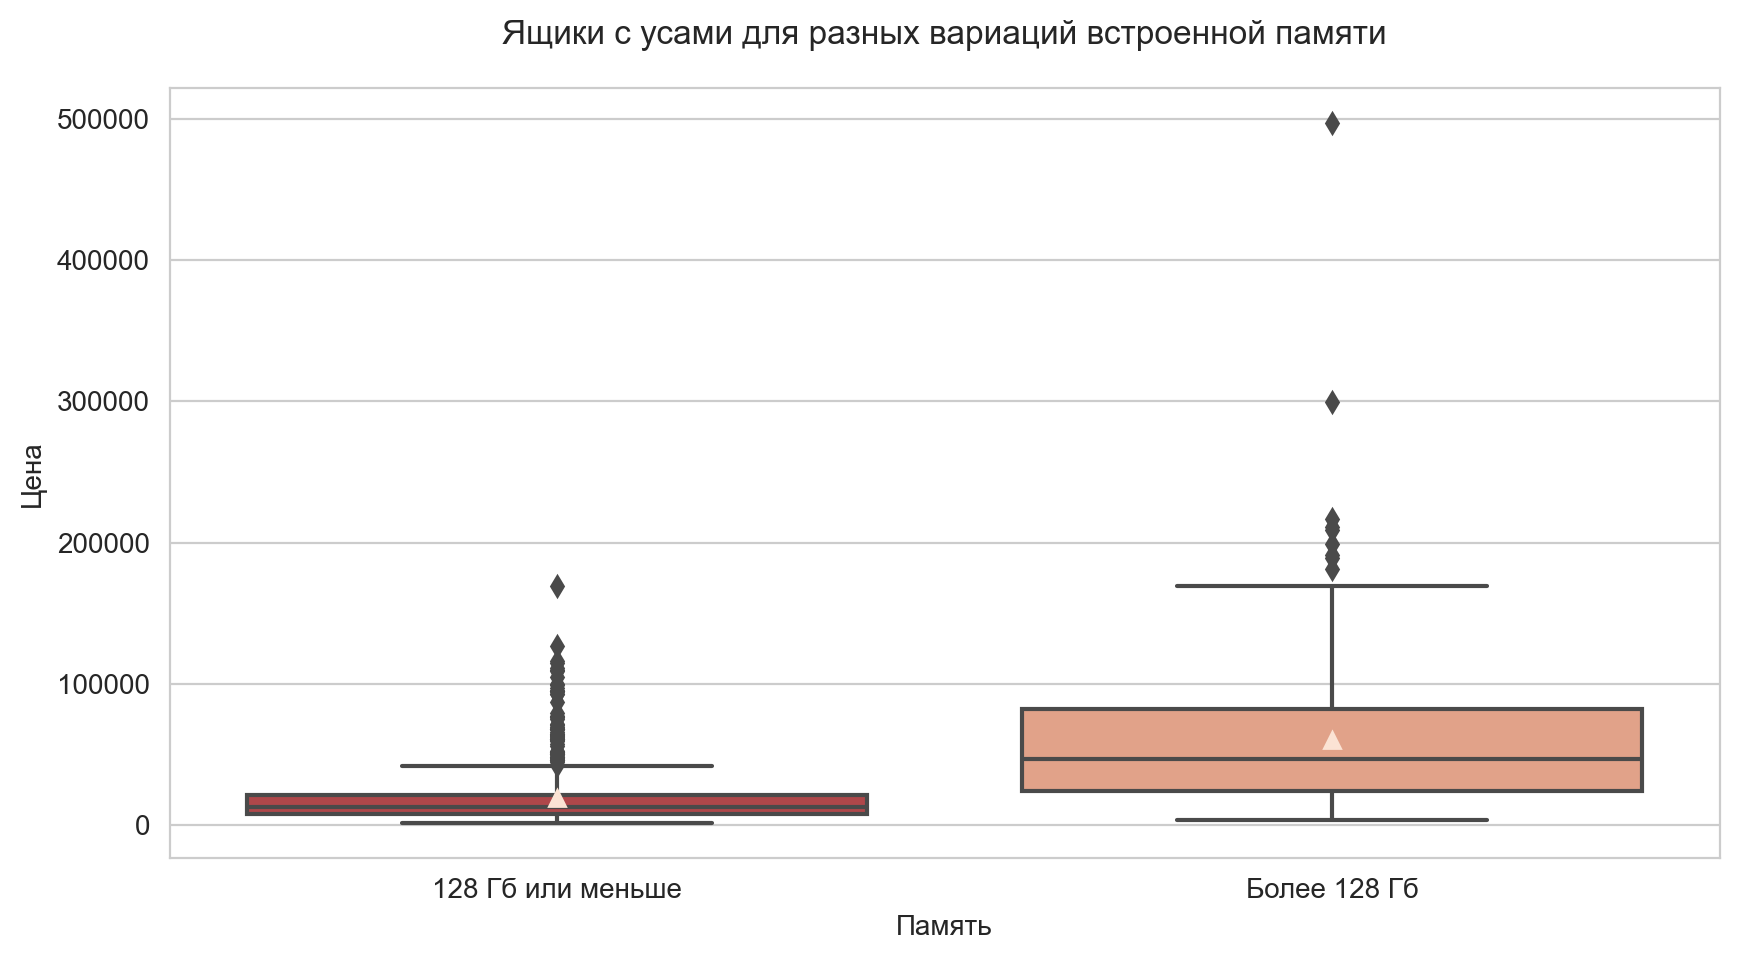

In [523]:
plt.figure (figsize = (10, 5))
sns.boxplot(x = 'Память', y = 'Цена', data = df, showmeans=True, order = ['128 Гб или меньше', 'Более 128 Гб'])
plt.title('Ящики с усами для разных вариаций встроенной памяти', pad = 16)

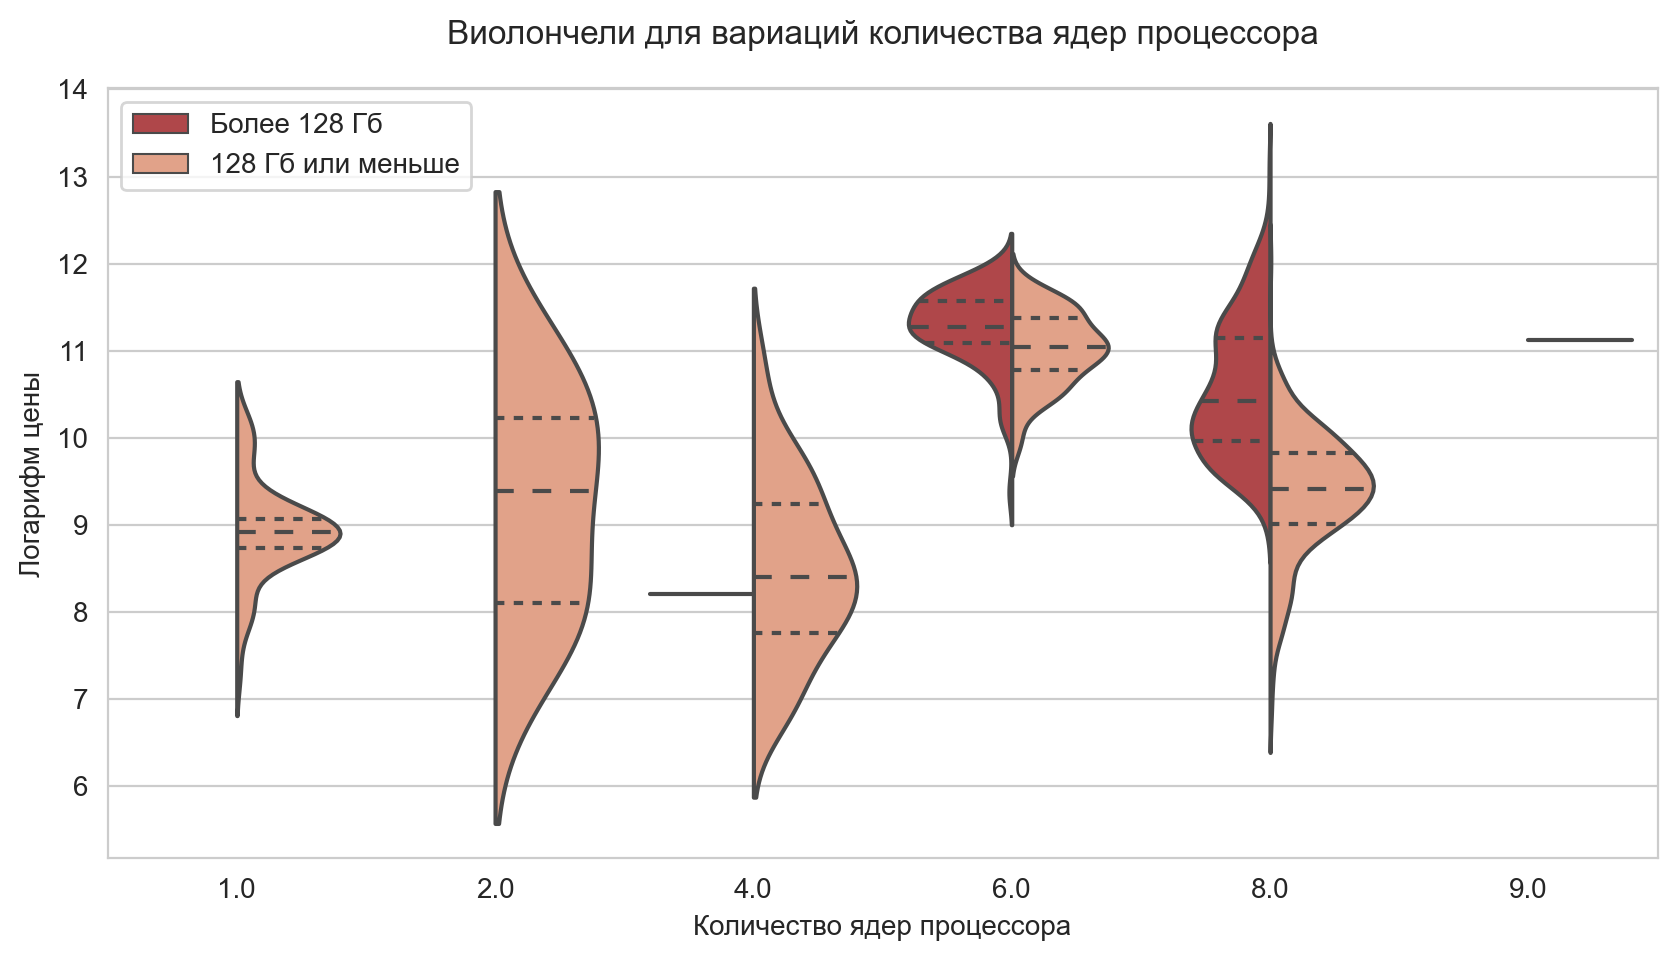

In [524]:
plt.figure (figsize = (10, 5))
sns.violinplot(x = df['Количество ядер процессора'], 
               y = df['Цена'].apply(lambda x: np.log(x+1)),
               hue = df['Память'], 
               inner = 'quartile', split = True)
plt.ylabel('Логарифм цены')
plt.title('Виолончели для вариаций количества ядер процессора', pad = 16)
plt.legend(loc = 'upper left')

Итак, основываясь на двух предыдущих графиках: 
1. Более 128 ГБ имеют телефоны с 6,8 и 9 ядрами.
2. Большую цену, конечно, имеют телефоны с памятью более 128 ГБ.
3. Самый высокий голарифм цены имеют телефоны с 8 ядрами и с памятью более 128 ГБ.

**Взаимосвязь ДИАГОНАЛИ ЭКРАНА И ЦЕНЫ**

Так как диагональ экрана также лежит в определенном промежутке, посмотрим на ее распределение:

(0.0, 135.0)

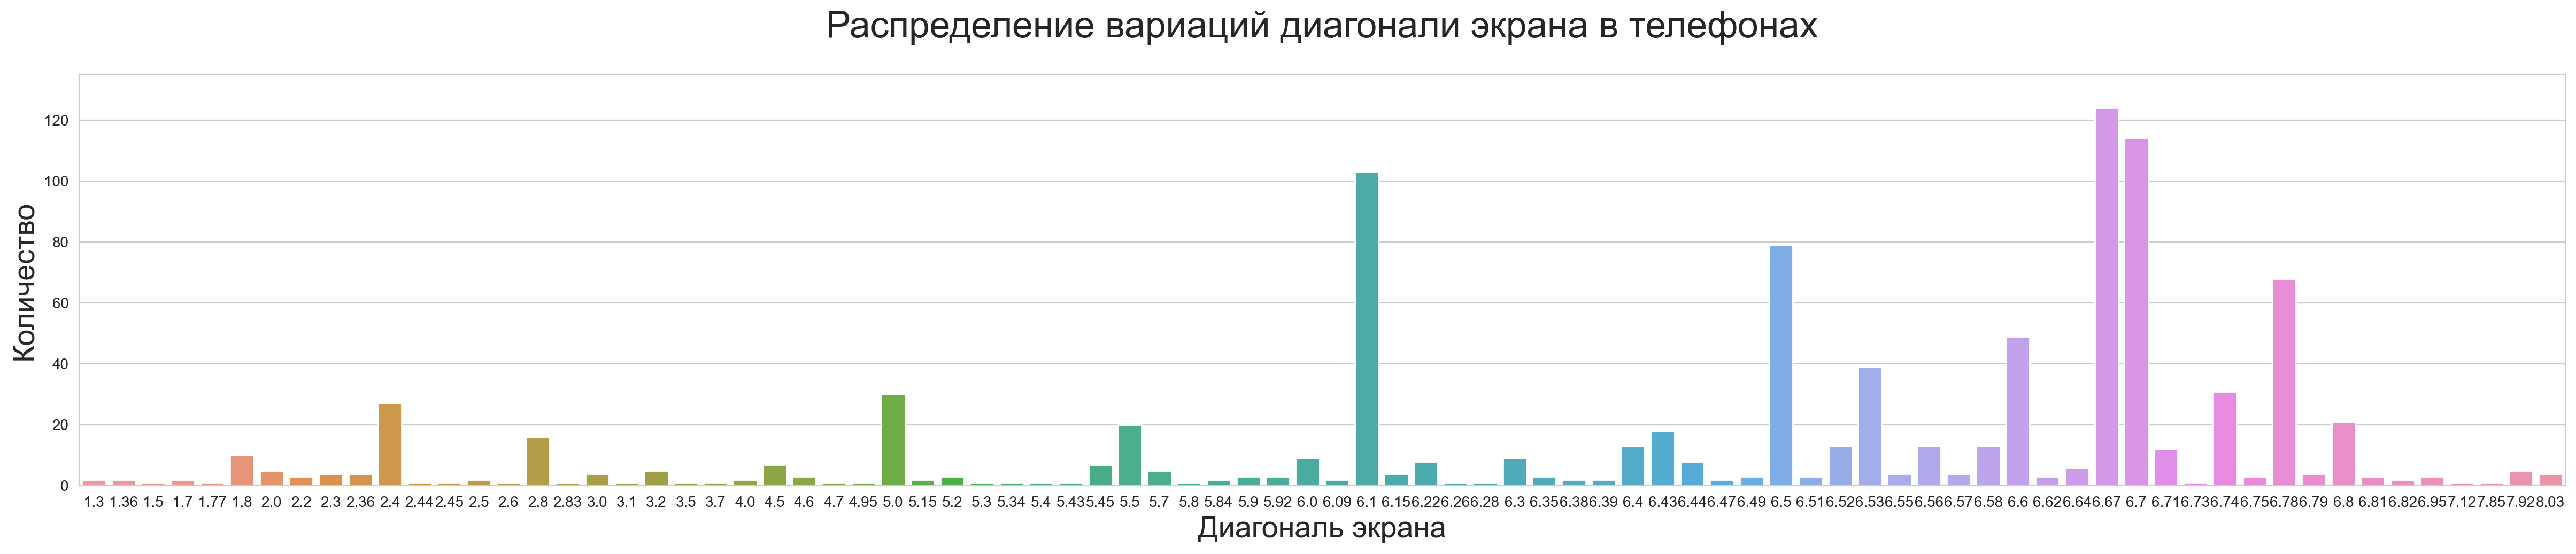

In [525]:
plt.figure (figsize = (30, 5))
fig = sns.countplot(x='Экран', data=df)
plt.title ('Распределение вариаций диагонали экрана в телефонах', pad = 25, fontsize = 25)
plt.ylabel('Количество', fontsize = 20)
plt.xlabel('Диагональ экрана', fontsize = 20)
plt.ylim(0, 135)

Так-с, ну наиболее популярная диагональ экрана: **6,67**, ей немного устпает диагональ **6,7**

Графически досточно сложно показать, как именно диагональ экрана влияет на цену, так как очнь много значений. Поверим нашей посчитаной корреляции:

Text(0.5, 1.0, 'Взаимосвязь между диагональю экрана и ценой')

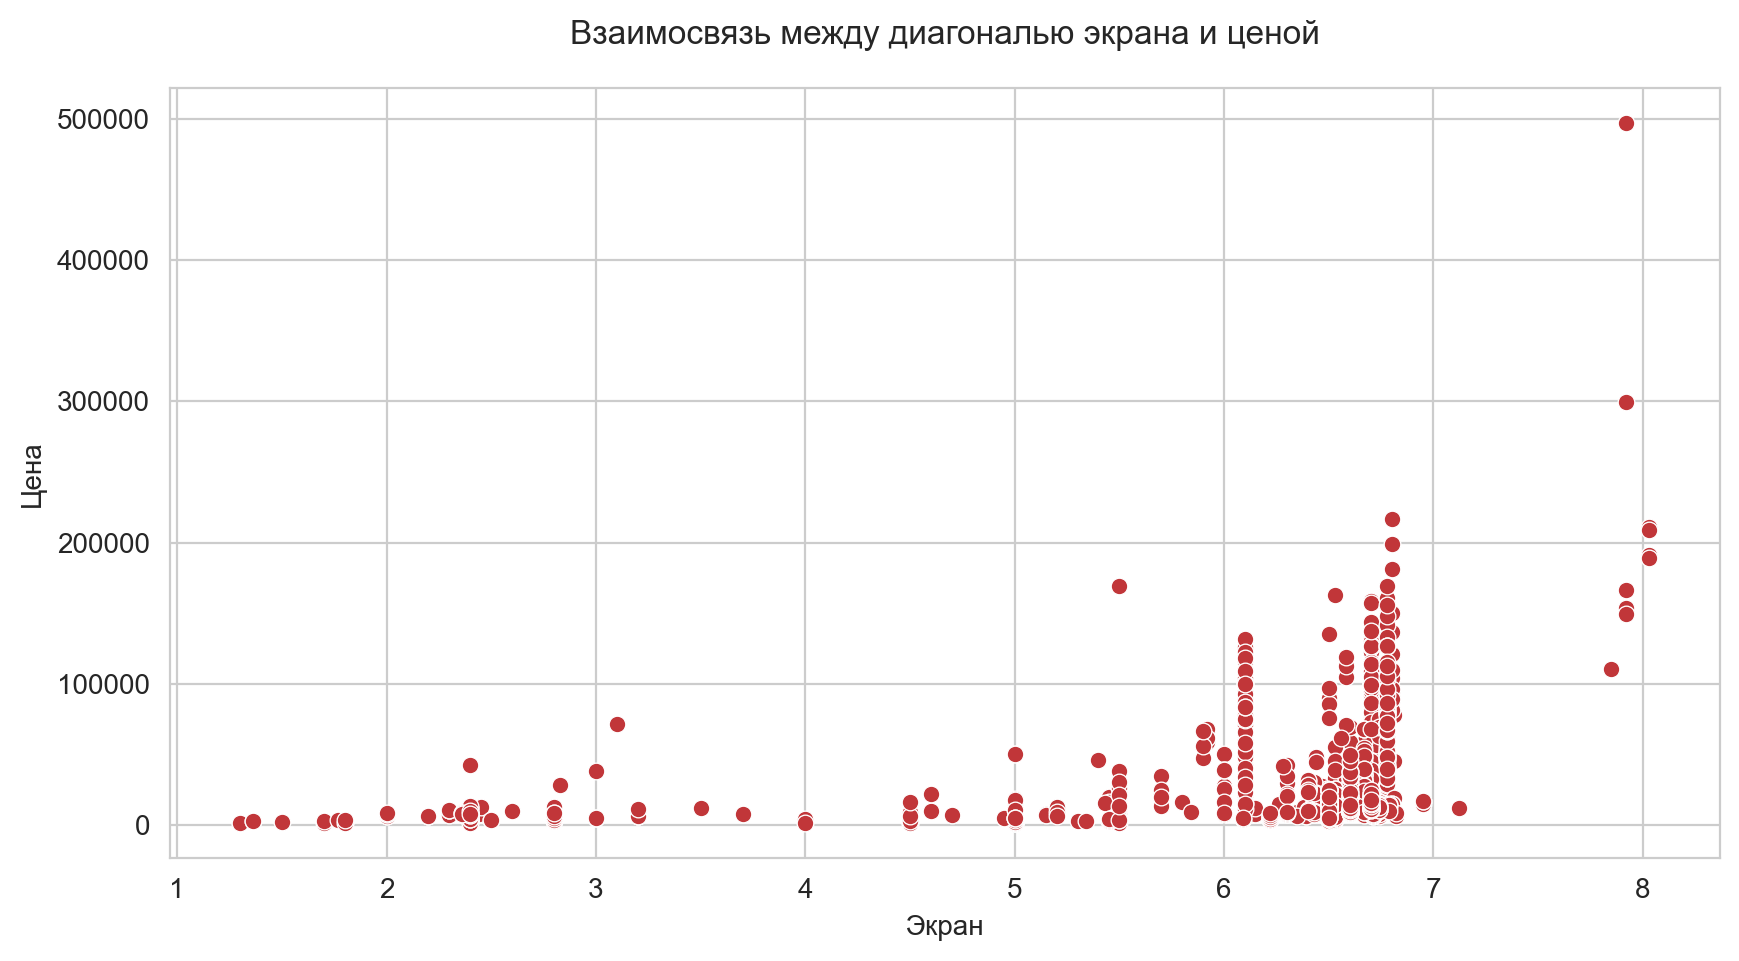

In [526]:
plt.figure (figsize = (10, 5))
sns.scatterplot(x = 'Экран', y = 'Цена', data = df)

plt.title('Взаимосвязь между диагональю экрана и ценой', pad = 16)

Можно в приницпе заметить, что все таки телефоны с большей диагональю стоят дороже - что подверждает положительная корреляция

Можно построить ящик с усами, введя новую перемнную:

In [527]:
df['Экран1'] = df['Экран'] <= 4

In [528]:
df.loc[df['Экран'] <= 4, 'Экран1'] = '4 ядра или меньше'
df.loc[df['Экран'] > 4, 'Экран1'] = 'Более 4 ядер'

Text(0.5, 1.0, 'Ящики с усами для разных вариаций диагонали экрана')

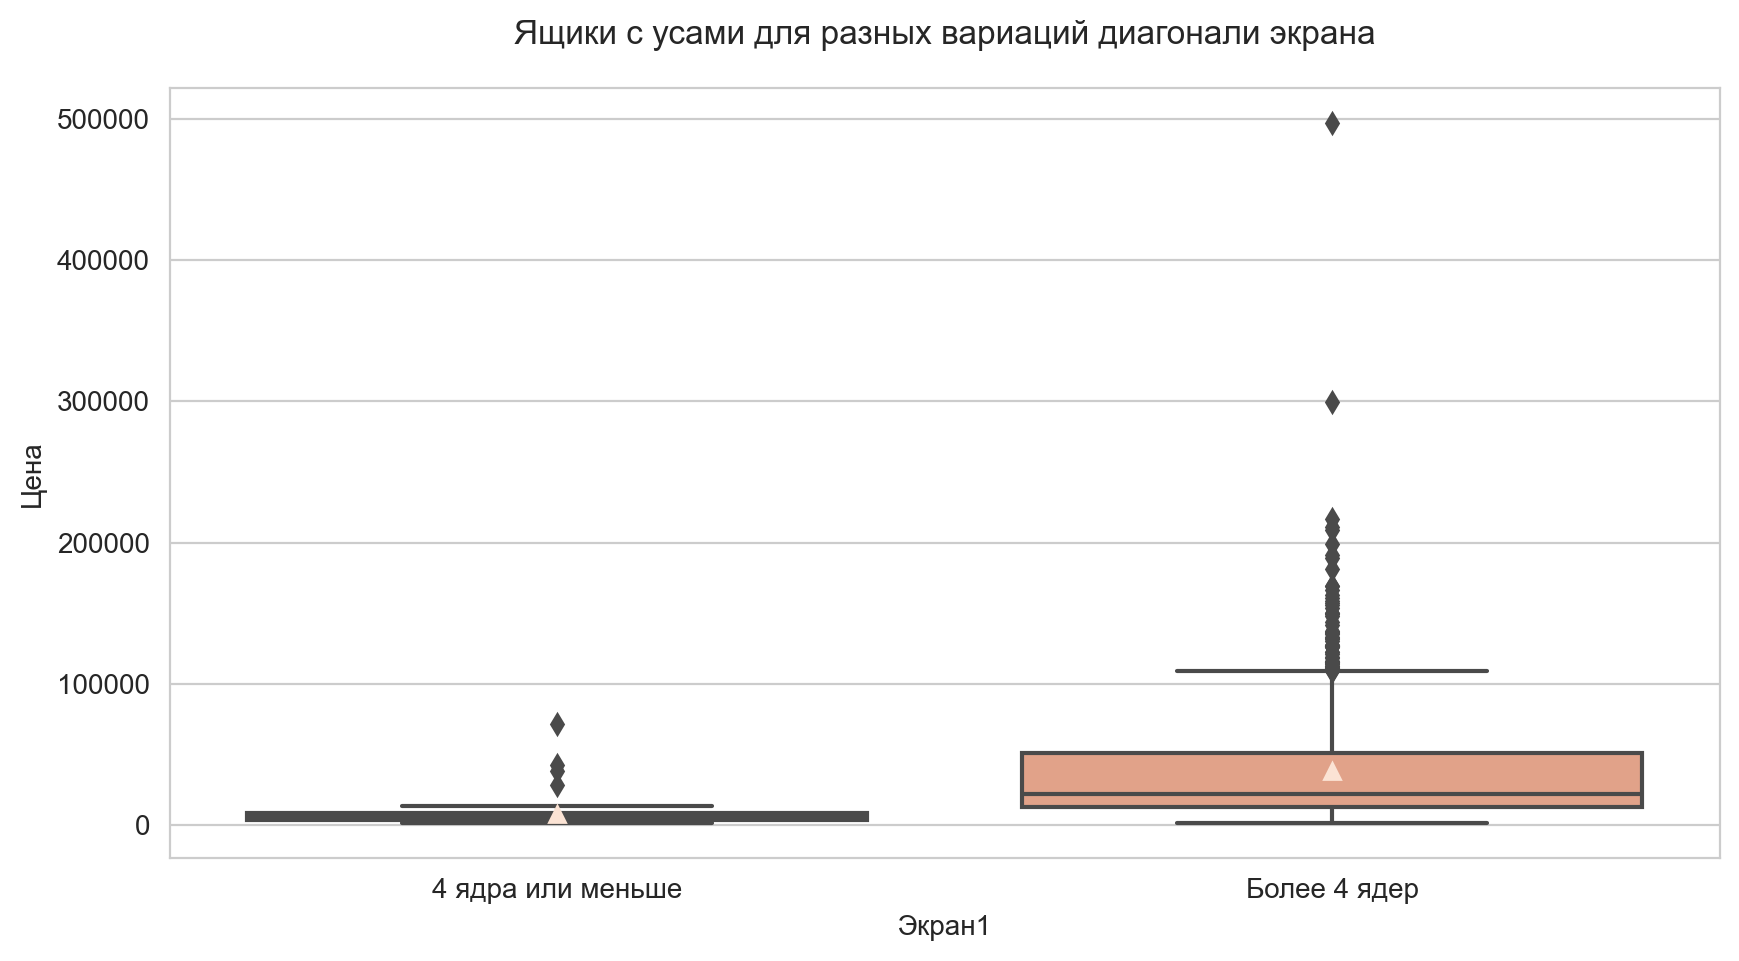

In [529]:
plt.figure (figsize = (10, 5))
sns.boxplot(x = 'Экран1', y = 'Цена', data = df, showmeans=True, order = ['4 ядра или меньше', 'Более 4 ядер'])
plt.title('Ящики с усами для разных вариаций диагонали экрана', pad = 16)

Как можно увидеть, действительно, существует положительная линейная взаимосвязь.

Можно попробовать визуализировать зависимость **ДИАГОНАЛИ ЭКРАНА** И **ВЕСА** - как мы видели у них сильная положительная корреляция (что логично - чем больше телефон, тем он тяжелее):

Text(0.5, 1.0, 'Взаимосвязь между диагональю экрана и весом')

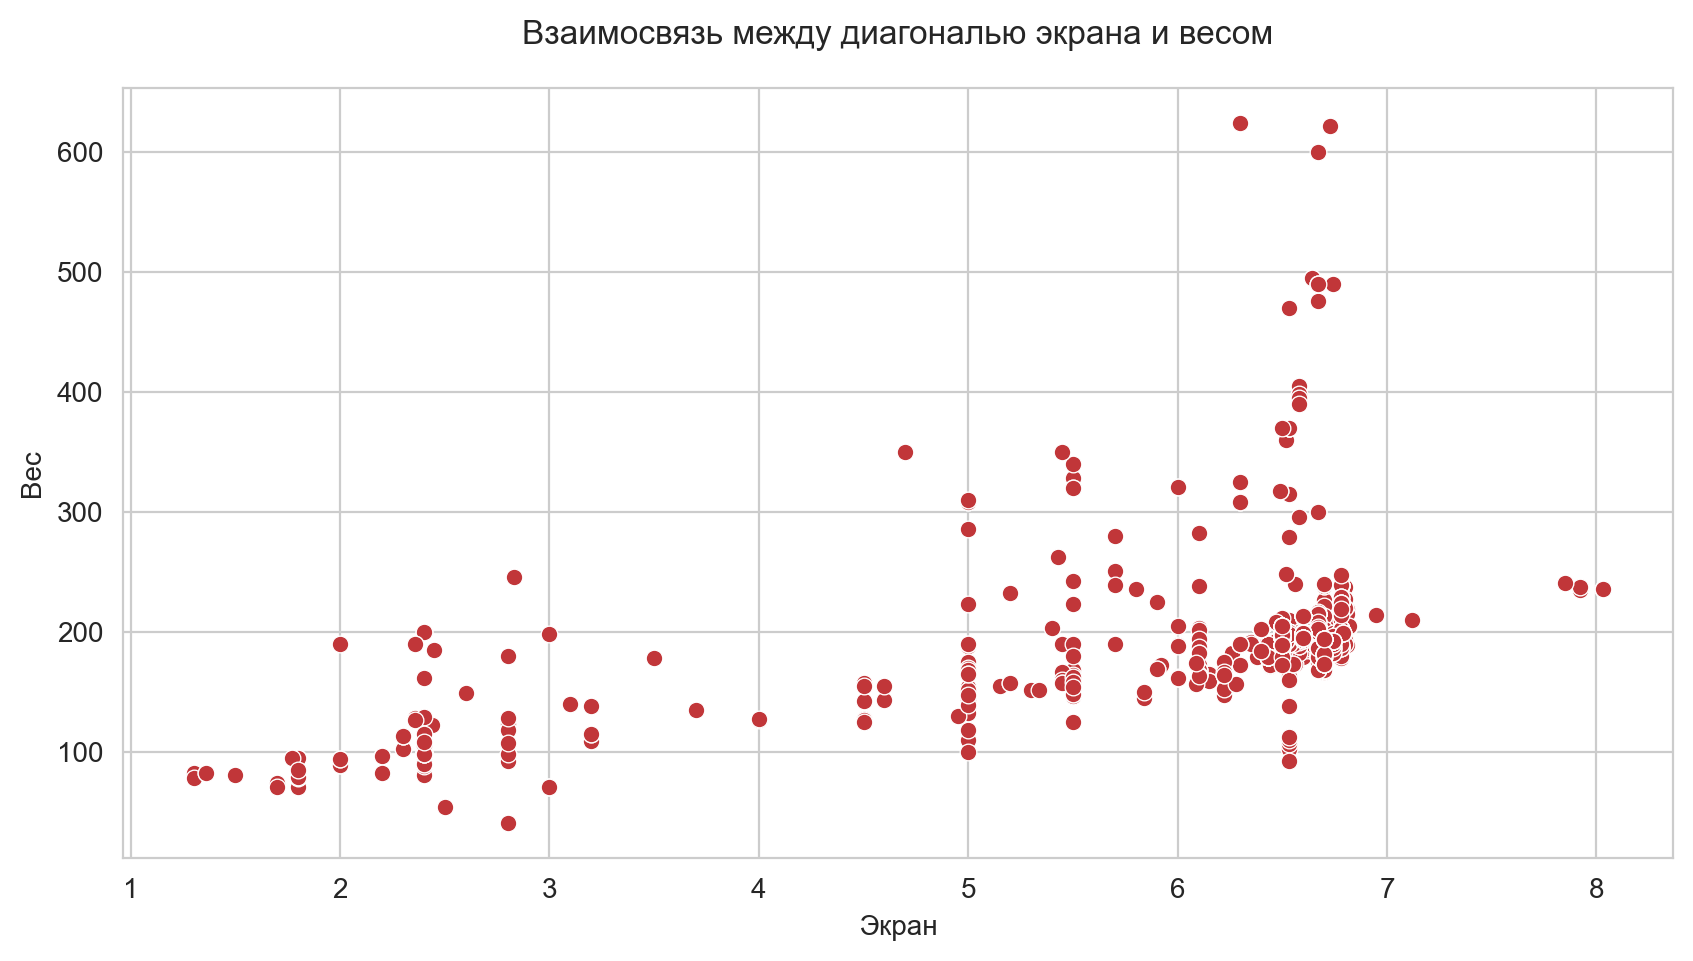

In [530]:
plt.figure (figsize = (10, 5))
sns.scatterplot(x = 'Экран', y = 'Вес', data = df)

plt.title('Взаимосвязь между диагональю экрана и весом', pad = 16)

График поддверждает наши предположения: чем больше телефон, тем он тяжелее

Под конец, хотлось бы посмотреть на самый дорогой телефон в выборке, что же там такого паронормального:

In [597]:
df[df['Цена'] == df['Цена'].max()]

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда,Is it IOS?,Бренд
199,Honor Magic V2,497054,Android,8.0,512.0,7.92,пластик,120.0,черный,237.0,41.0,0,Honor


ТАК-С, ну это ХОНОР (неожидано), количество ядер не максимальное (8), много памяти (но не максимально) - 512 ГБ, цвет черный (хммм - может в этом прикол, проанализируем далее :) )

## Шаг 5. Создание новых перемнных

In [531]:
df = df.drop('Память', axis = 1)

In [532]:
df = df.drop('Экран1', axis = 1)

ПЕРВЫЙ ПРИЗНАК, который мы введем, будет **"Является ли телефон компании APPLE?"**, так как принято считать, что продукция именно этого бренда самая дорогая. Да и в принципе, мы это увидели ранее:

In [534]:
df['Is it IOS?'] = 1*(df['Операционная система'] == 'ios')

Посмотрим на то, как этот признак связан с цено:

In [535]:
df.corr(numeric_only=True)['Цена']

Цена                              1.000000
Количество ядер процессора        0.055553
Встроенная память (ГБ)            0.642615
Экран                             0.317791
Частота обновления экрана (ГЦ)    0.195324
Вес                               0.253513
Время заряда                     -0.157555
Is it IOS?                        0.434658
Name: Цена, dtype: float64

Ииии, можно заметить, что наши ожидания оправдались! Действительно наблюдается достаточно сильная корреляция (0,43). То есть в данном случае бренд имеет значение!

ВТОРАЯ ПЕРЕМННАЯ: попробуем извлечь бренд/название телефона из столбца **НАЗВАНИЕ**

In [538]:
df['Бренд'] = df['Название'].apply(lambda x: x.split()[0])

In [539]:
df

,Название,Цена,Операционная система,Количество ядер процессора,Встроенная память (ГБ),Экран,Материал корпуса,Частота обновления экрана (ГЦ),Цвет,Вес,Время заряда,Is it IOS?,Бренд
0,IPhone 15 Pro Max,111374,ios,6.0,256.0,6.7,титан,120.0,черный,221.0,30.0,1,IPhone
1,IPhone 14,61015,ios,6.0,128.0,6.1,алюминий и стекло,60.0,черный,172.0,30.0,1,IPhone
2,IPhone 15 Pro,109285,ios,6.0,128.0,6.1,титан,120.0,титан,187.0,41.0,1,IPhone
3,IPhone 13,60874,ios,6.0,128.0,6.1,алюминий и стекло,60.0,черный,173.0,30.0,1,IPhone
4,IPhone 15 Pro,94635,ios,6.0,128.0,6.1,титан,120.0,синий,187.0,41.0,1,IPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Samsung Galaxy A23 6,11630,Android,8.0,128.0,6.6,пластик,90.0,белый,195.0,41.0,0,Samsung
996,Samsung Galaxy A05s 4,21781,Android,8.0,64.0,6.7,пластик,90.0,черный,194.0,41.0,0,Samsung
997,Samsung Galaxy A53 5G 6,19786,Android,8.0,256.0,6.5,стекло и пластик,120.0,белый,189.0,41.0,0,Samsung
998,Samsung Galaxy A23 4,14288,Android,8.0,128.0,6.6,пластик,90.0,черный,195.0,41.0,0,Samsung


Давайте теперь посмотрим на распределение брендов в данных:

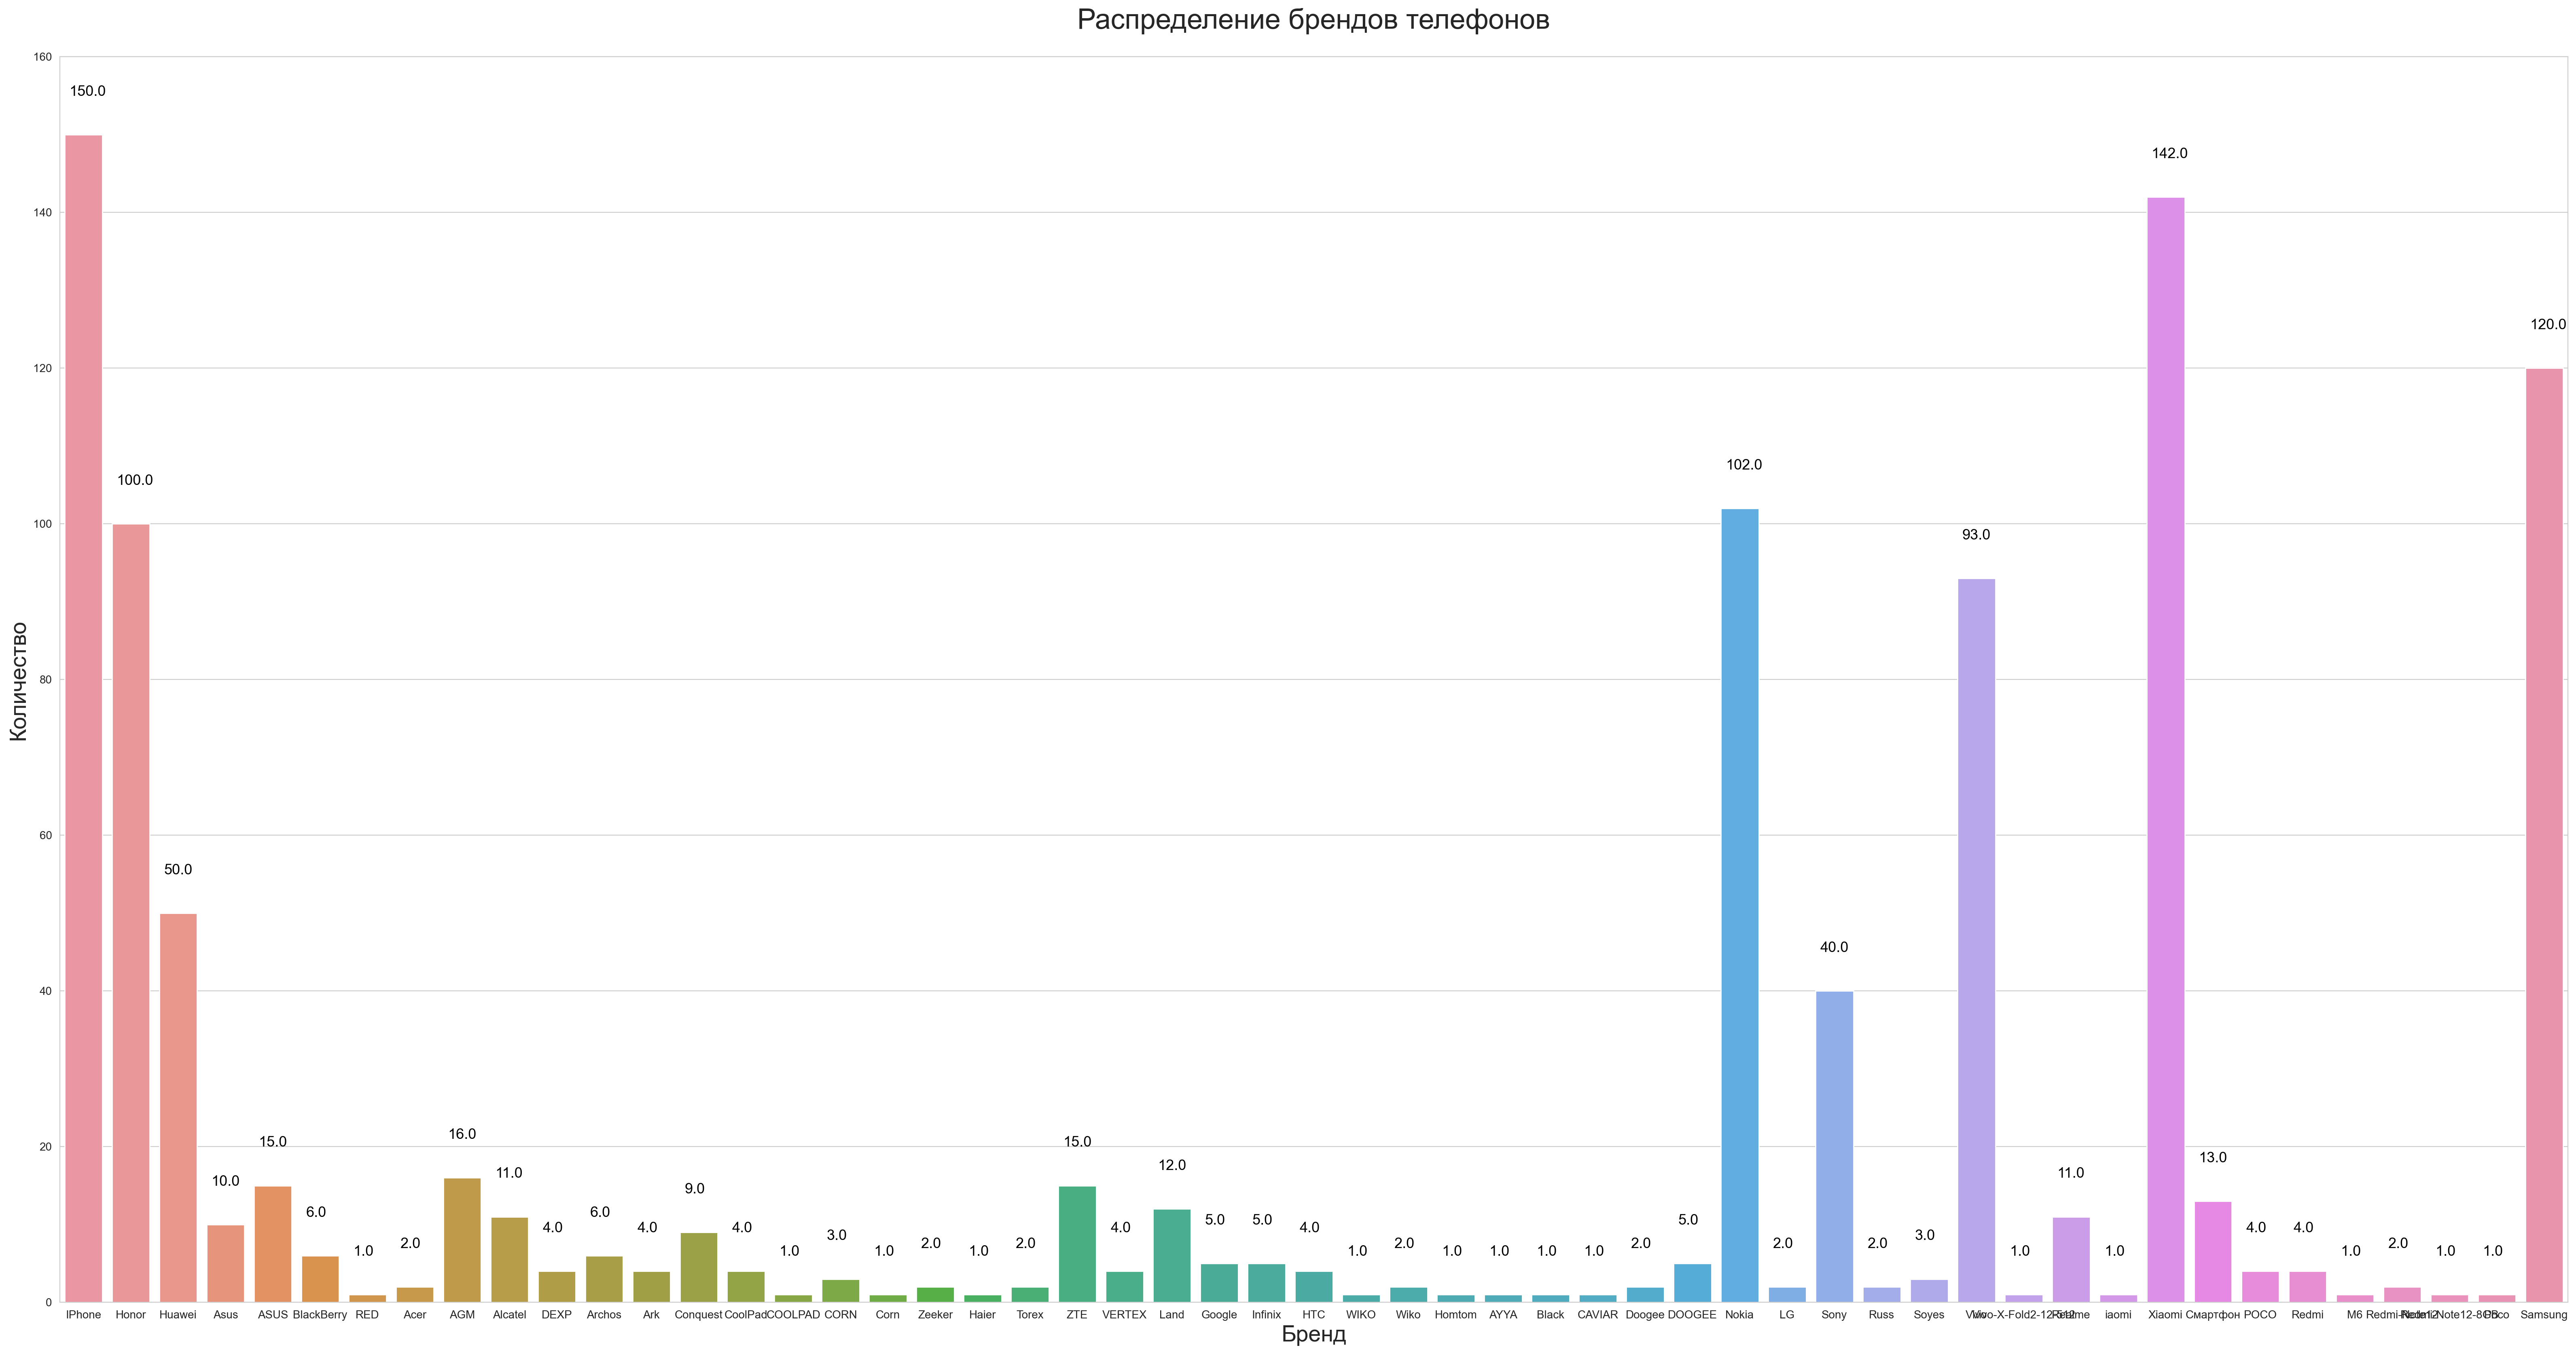

In [551]:
plt.figure (figsize = (40, 20))
fig = sns.countplot(x='Бренд', data=df)
plt.title ('Распределение брендов телефонов', pad = 25, fontsize = 25)
plt.ylabel('Количество', fontsize = 20)
plt.xlabel('Бренд', fontsize = 20)
plt.ylim(0, 160)
for p in fig.patches:
    fig.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+5), color='black', size=13)

Тепепь можно сказать, что больше в наших данных как раз АЙФОНОВ, КСЯОМИ, САМСУНГОВ, НОКИА, ВИВО

## Шаг 6. Проверка гипотиз

У меня возникло несколько гипотез, которые я хочу проверить:

1. Влияет ли бренд APPLE на цену? (APPLE является самым популярным брендом, поэтому ожидается, что цены на их товары будт выше)
2. Вияет ли бренд Xiaomi на цену? (Сейчас очень распространены эти телефоны по всему миру. Кроме того, будет классно посмотреть влияние американской фирмы на цену и китайской фирмы на этот же показатель)
3. Влияет черный цвет телефона на цену? (как мы выяснили ранее черный цвет - самый популярный цвет телефона)

### №1 Влияет ли APPLE на цену?

Составим вектор **x** в котором будет находится параметр, который гарантриует принадлежность к бренду APPLE. Аналогично вектор 
 **y**, в котором будут лежать все остальные телефоны. Рассмотрим ассимптотическую Z-оценку. Тогда формулируем гипотезы в следующей форме:

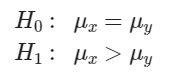

Проверяем на 5% уровне значимости:

In [556]:
x = (df[df['Is it IOS?'] == 1] ['Цена']).values
y = (df[df['Is it IOS?'] != 1] ['Цена']).values

x.shape, y.shape

((150,), (850,))

Можно увидеть, что телефонов от компании ЭПЛ меньше, чем от остальных брендов, однако количество данных для каждой группы велико, чтобы применить ЦПТ:

In [557]:
x.mean(), y.mean()

(76881.30666666667, 27637.71294117647)

Можно сразу же увидеть, что телефоны от компании ЭПЛ стоят намного дороже, чем от других компаний (разница достатчоно значительная). Проверим ее статическую значимость:

In [558]:
z= (x.mean() - y.mean()) / np.sqrt(x.var(ddof = 1)/x.size + y.var(ddof = 1)/y.size)
p_value = 1 - sts.norm().cdf(z)
p_value < 0.05

True

То есть наша гипотеза о равенстве мат.ожиданий отвергается на 5% уровне значимости.

Проверим, может на более нижнем уровне она уже отвергается:

In [559]:
p_value < 0.01

True

То есть гипотеза отвергается уже на 1% уровне значимости! Разница получилась статистически значимой.

Посмотрим далее на распределение (у нас есть выбросы, они могли что-то исказить, для использования ЦПТ вполне достаточно наблюдений):

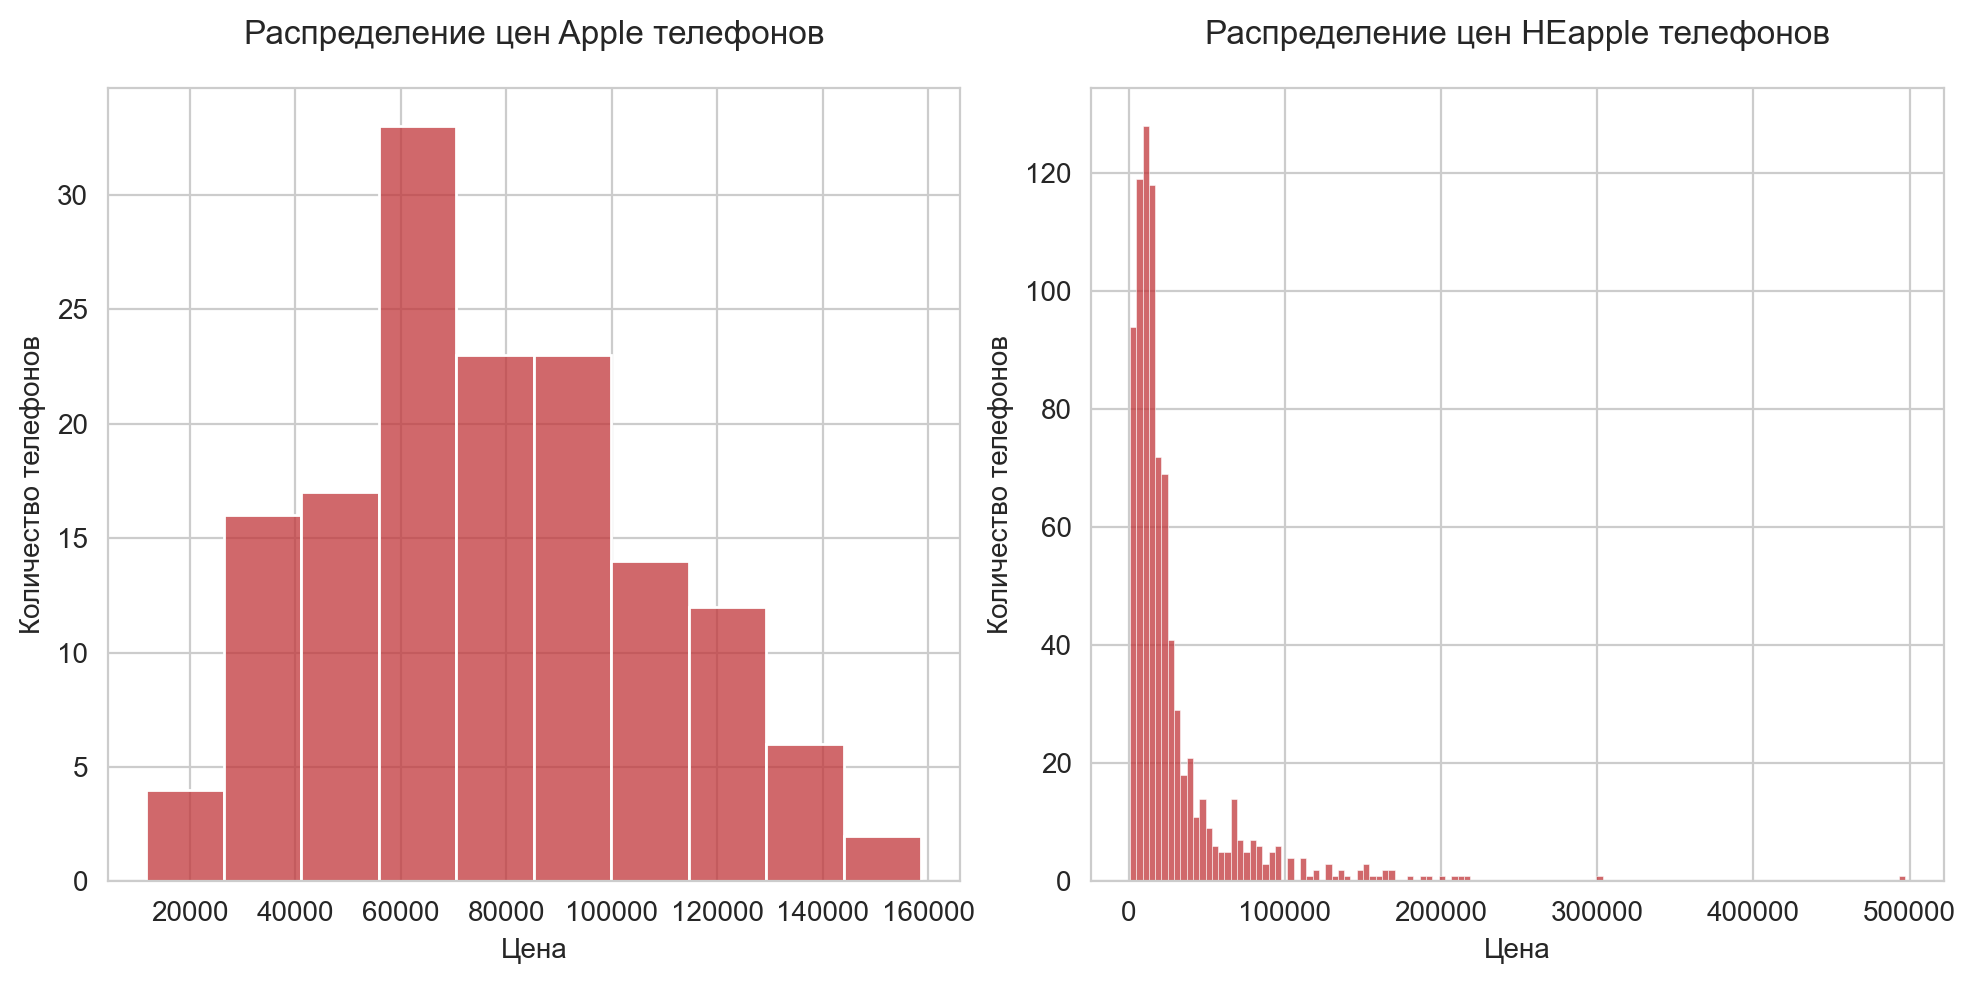

In [560]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(x, ax = axes[0])
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Количество телефонов')
axes[0].set_title('Распределение цен Apple телефонов', pad = 16)

sns.histplot(y, ax = axes[1])
axes[1].set_xlabel('Цена')
axes[1].set_ylabel('Количество телефонов')
axes[1].set_title('Распределение цен НЕapple телефонов', pad = 16)
plt.tight_layout()

Как можно увидеть, выбросы имеются. Поэтому стоит провести тест Манна-Уитни, чтобы поддвердить наши результаты:

In [561]:
fig, pval = sts.mannwhitneyu(x, y, alternative='greater')
pval < 0.01

True

Следовательно, наш вывод подтверждается: телефоны от марки ЭПЛ стоят дороже.

### №2 Вияет ли бренд Xiaomi на цену

Как и в предыдущем пунтке (при проверке 1 гипотезы):

Составим вектор x в котором будет находится параметр, который гарантриует принадлежность к бренду Xiaomi. Аналогично вектор y, в котором будут лежать все остальные телефоны. Рассмотрим ассимптотическую Z-оценку. Тогда формулируем гипотезы в следующей форме:

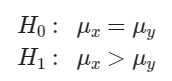

Проверяем на 5% уровне значимости:

In [562]:
x = (df[df['Бренд'] == 'Xiaomi'] ['Цена']).values
y = (df[df['Бренд'] != 'Xiaomi'] ['Цена']).values

x.shape, y.shape

((142,), (858,))

Можно увидеть, что телефонов от компании XIAOMI меньше, чем от остальных брендов, однако количество данных для каждой группы велико, чтобы применить ЦПТ:

In [563]:
x.mean(), y.mean()

(17585.929577464787, 37910.31468531468)

Можно сразу же увидеть, что телефоны от компании XIAOMI стоят намного дешевле (!а не дороже!), чем от других компаний (разница достатчоно значительная). Проверим ее статическую значимость:

In [564]:
z= (x.mean() - y.mean()) / np.sqrt(x.var(ddof = 1)/x.size + y.var(ddof = 1)/y.size)
p_value = 1 - sts.norm().cdf(z)
p_value < 0.05

False

То есть наша гипотеза о равенстве мат.ожиданий принимается на 5% уровне значимости.

Посмотрим далее на распределение (у нас есть выбросы, они могли что-то исказить, для использования ЦПТ вполне достаточно наблюдений):

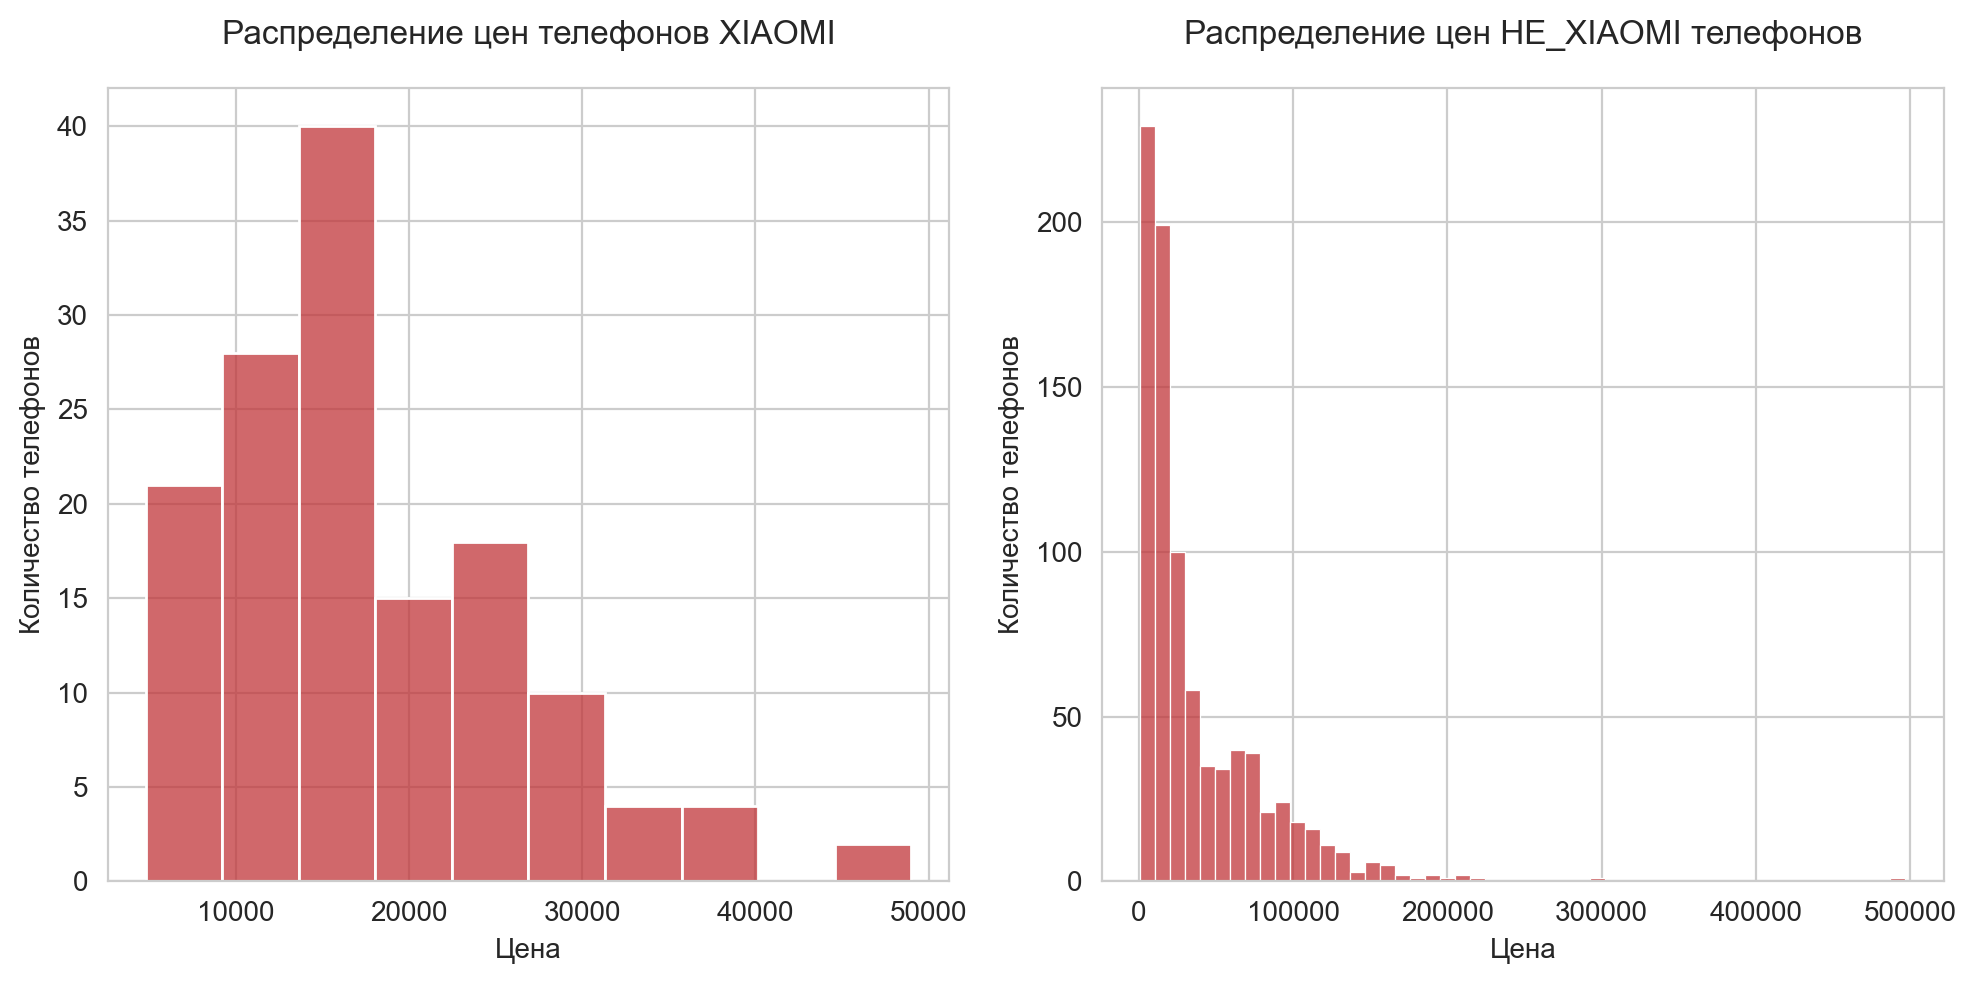

In [565]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(x, ax = axes[0])
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Количество телефонов')
axes[0].set_title('Распределение цен телефонов XIAOMI', pad = 16)

sns.histplot(y, ax = axes[1])
axes[1].set_xlabel('Цена')
axes[1].set_ylabel('Количество телефонов')
axes[1].set_title('Распределение цен НЕ_XIAOMI телефонов', pad = 16)
plt.tight_layout()

Как можно увидеть, выбросы имеются. Поэтому стоит провести тест Манна-Уитни, чтобы поддвердить наши результаты:

In [566]:
fig, pval = sts.mannwhitneyu(x, y, alternative='greater')
pval < 0.05

False

Таким образом, тест Манна-Уитни показал точно такие же результаты, поэтому можно быть уверенными в наших результатах. 

**Вывод:** телефоны марки XIAOMI стоят дешевле чем другая масса телефонов!

### №3 Влияет черный цвет телефона на цену?

Как и в предыдущем пунтке (при проверке 1 гипотезы):

Составим вектор x в котором будет находится параметр, который гарантриует принадлежность теелфона к черному цвету. Аналогично вектор y, в котором будут лежать все остальные телефоны. Рассмотрим ассимптотическую Z-оценку. Тогда формулируем гипотезы в следующей форме:

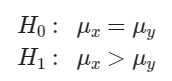

Проверяем на 5% уровне значимости:

In [568]:
x = (df[df['Цвет'] == 'черный'] ['Цена']).values
y = (df[df['Цвет'] != 'черный'] ['Цена']).values

x.shape, y.shape

((331,), (669,))

Можно увидеть, что телефонов черного цвета меньше, чем от остальных цветов, однако количество данных для каждой группы велико, чтобы применить ЦПТ:

In [569]:
x.mean(), y.mean()

(33933.63746223565, 35563.85351270553)

Можно сразу же увидеть, что телефоны черного цевта стоят дешевле (!а не дороже!), чем от телефоны других цветов (разница не очень значительная). Проверим ее статическую значимость:

In [570]:
z= (x.mean() - y.mean()) / np.sqrt(x.var(ddof = 1)/x.size + y.var(ddof = 1)/y.size)
p_value = 1 - sts.norm().cdf(z)
p_value < 0.05

False

То есть наша гипотеза о равенстве мат.ожиданий принимается на 5% уровне значимости.

Посмотрим далее на распределение (у нас есть выбросы, они могли что-то исказить, для использования ЦПТ вполне достаточно наблюдений):

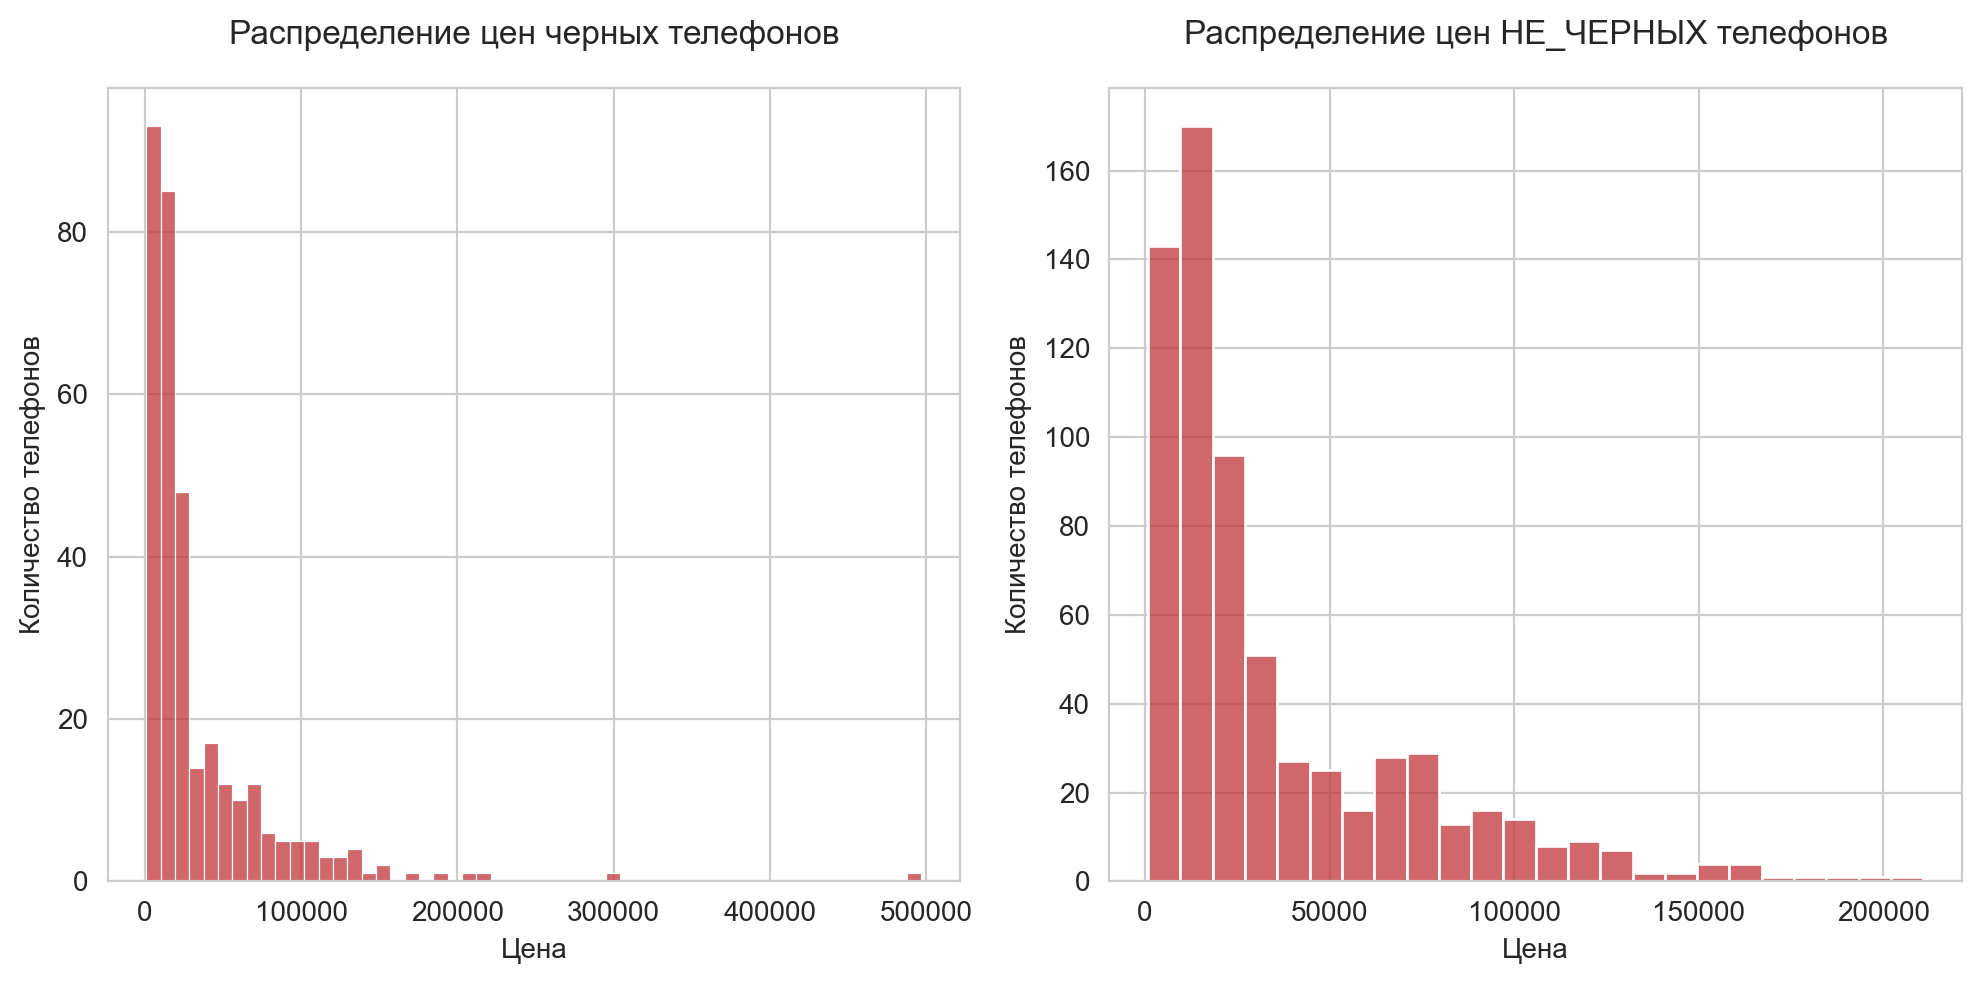

In [571]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(x, ax = axes[0])
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Количество телефонов')
axes[0].set_title('Распределение цен черных телефонов', pad = 16)

sns.histplot(y, ax = axes[1])
axes[1].set_xlabel('Цена')
axes[1].set_ylabel('Количество телефонов')
axes[1].set_title('Распределение цен НЕ_ЧЕРНЫХ телефонов', pad = 16)
plt.tight_layout()

Как можно увидеть, выбросы имеются. Поэтому стоит провести тест Манна-Уитни, чтобы поддвердить наши результаты:

In [572]:
fig, pval = sts.mannwhitneyu(x, y, alternative='greater')
pval < 0.05

False

Таким образом, тест Манна-Уитни показал точно такие же результаты, поэтому можно быть уверенными в наших результатах.

Вывод: черные телефоны стоят дешевле чем другая масса телефонов!

## Шаг 7. Машинное обучение

**ПОСТАВЛЕННАЯ ЗАДАЧА**: Предсказание цены телефонов по их характеристикам

**КОМУ ЭТО БУДЕТ ПОЛЕЗНО?** Производителям, чтобы понимать, какую цену устанавливать на их модель

**КАК БУДЕМ ОБУЧАТЬ МОДЕЛЬ?** Будем использовать модель линейой регрессии с таргетом **ЦЕНА**. Объясняющие переменные: **КОЛИЧЕСТВО ЯДЕР ПРОЦЕССОРА, ВСТРОЕННАЯ ПАМЯТЬ, ЭКРАН, ЧАСТОТА ОБНОВЛЕНИЯ ЭКРАНА, ВЕС, ВРЕМЯ ЗАРЯДА, IS IT IOS**

Создадим новую таблицу с только нужными нам характеристиками:

In [576]:
X_1 = df[['Количество ядер процессора', 'Встроенная память (ГБ)', 'Экран', 'Частота обновления экрана (ГЦ)', 'Вес', 'Время заряда', 'Is it IOS?']]

In [577]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Количество ядер процессора      1000 non-null   float64
 1   Встроенная память (ГБ)          1000 non-null   float64
 2   Экран                           1000 non-null   float64
 3   Частота обновления экрана (ГЦ)  1000 non-null   float64
 4   Вес                             1000 non-null   float64
 5   Время заряда                    1000 non-null   float64
 6   Is it IOS?                      1000 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 50.9 KB


Краткая характеристика: пропущенных значений нет, все данные количественные. Приступаем, с богом!

Запишем паргет:

In [578]:
Y = df['Цена']

Из-за того, что у нас очень большой разброс цен и много выбросов, мы работали ранее с логарифмом цены (которое похоже на нормальное распределение). Здесь будем также работать с логарифмом:

In [579]:
Y = Y.apply(lambda x: np.log(x+1))

Распределение логарифма можно найти ранее в работе

In [592]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, Y, test_size=0.2, random_state=30)

In [593]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

Наивный прогноз: предскажем всем телефонам из тестовой выборки среднее значение цена по обучающей выборке.

In [594]:
mse(y_test, y_train.mean()*np.ones(y_test.shape))

1.251789084843197

Будем отталкиваться от этого MSE: если получится результат MSE ниже, чем 1,183, значит модель работает лучше, чем наивный прогноз.

Поработаем без регуляризаторов:

In [595]:
m1 = LR()
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
y_train_pred = m1.predict(X_train)
print("Test MSE = ", mse(y_test, y_pred))
print("Train MSE = ", mse(y_train, y_train_pred))

Test MSE =  0.4193840533384835
Train MSE =  0.37862180459561473


In [596]:
m1.coef_

array([-1.23605879e-04,  1.92459594e-03,  2.43812517e-01,  9.12116628e-03,
        1.72465927e-03, -1.41706608e-03,  1.31015549e+00])

Замечаем, что значение MSE снизилось: 0,42 по сравнению с первоначальными 1,25. При этом, результат MSE на тренировочной выборке меньше чем на тестовой - случилось переобучение

Попробуем нормировать данные:

In [598]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LR()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

print("Test MSE =", mse(y_test, y_pred))
print("Train MSE =", mse(y_train, y_train_pred))

Test MSE = 0.4193840533384838
Train MSE = 0.3786218045956147


In [599]:
lr.coef_

array([-2.30151856e-04,  3.86111224e-01,  3.10203191e-01,  2.32389318e-01,
        1.03417866e-01, -3.06682877e-02,  4.67819083e-01])

ОКЕЙ, ничего не поменялось, попробуем другой метод....

In [603]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(m1, X_1, Y, cv=10, scoring='neg_mean_squared_error')

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores), sep = '')
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	-0.4928
	-0.3437
	-0.2639
	-1.1910
	-0.4923
	-0.6587
	-0.5417
	-0.2345
	-0.1395
	-0.1347
Mean CV MSE = 0.4493


В приниципе, результат стал лучше: попробуем подобрать гиперпараметры. Также сделаем регулиризацию (так как у нас случилось переобучение ранее):

In [604]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(
    Ridge(), [{"alpha": alphas}], 
    scoring="neg_root_mean_squared_error", cv=10
)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha =", best_alpha)

Best alpha = 7.847599703514606


In [607]:
m2 = Ridge(alpha=best_alpha) 

m2.fit(X_train, y_train)
y_pred = m2.predict(X_test)
y_train_pred = m2.predict(X_train)

print("Test MSE =", mse(y_test, y_pred))
print("Train MSE =", mse(y_train, y_train_pred))

Test MSE = 0.41496558733381306
Train MSE = 0.3800443370441441


In [608]:
m2.coef_

array([-0.00891618,  0.00198806,  0.24493418,  0.00857609,  0.00174875,
       -0.00173407,  1.18777079])

Можно заметить, что результаты улучшились! Была проведена регулиризация, которая помогла!